# **HW 2: Bank Marketing**
<hr>

<u>**Members**</u><br>
Tharnarch Thoranisttakul 63340500025<br>
Athimet Aiewcharoen 63340500068
<hr>

## **Functions and Necessary Libraries**

In [259]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas_profiling as pp

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder , OneHotEncoder

# Fetures selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, StratifiedKFold, cross_val_score

# Neural network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Resampling
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import InstanceHardnessThreshold, RandomUnderSampler, NearMiss

# Classification metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, precision_recall_curve
from sklearn import metrics

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Make image directory (img)
import os
if not os.path.exists('img'):
    os.mkdir('img')

In [260]:
class LabelEncoder2():
    def __init__(self, toEncode:list, columnToEncode:list):
        self.toEncode = toEncode
        self.columnToEncode = columnToEncode
        
    def transform(self,X,y=None,**transform_params):
        for toEn, colToEn in zip(self.toEncode, self.columnToEncode):
            X[colToEn] = X[colToEn].apply(lambda x: toEn.index(x))
        return X
    
    def fit(self, X, y=None, **fit_params):
        return self

In [261]:
class ToDummiesTransformer(BaseEstimator, TransformerMixin):
    """ A Dataframe transformer that provide dummy variable encoding
    """
    
    def transform(self, X, **transformparams):
        """ Returns a dummy variable encoded version of a DataFrame
        
        Parameters
        ----------
        X : pandas DataFrame
        
        Returns
        ----------
        trans : pandas DataFrame
        
        """
    
        trans = pd.get_dummies(X).copy()
        return trans

    def fit(self, X, y=None, **fitparams):
        """ Do nothing operation
        
        Returns
        ----------
        self : object
        """
        return self

## **Data Exploration**

From the description file, there are a total of 17 features in this dataset which are:

|Feature Name|Description|Data Type|
|:-:|-|:-:|
|<font color='green'>age</font>|Customer's age (in years)|<font color='red'>Numerical</font>|
|<font color='green'>job</font>|Types of Job|<font color='red'>Categorical</font>|
|<font color='green'>marital</font>|Marital Status|<font color='red'>Categorical</font>|
|<font color='green'>education</font>|Education|<font color='red'>Categorical</font>|
|<font color='green'>default</font>|Has credit in Default?|<font color='red'>Categorical</font>|
|<font color='green'>balance</font>|Average yearly balance|<font color='red'>Numerical</font>|
|<font color='green'>housing</font>|Has housing loan?|<font color='red'>Categorical</font>|
|<font color='green'>loan</font>|Has personal loan?|<font color='red'>Categorical</font>|
|<font color='green'>contact</font>|Contact Communication Type|<font color='red'>Categorical</font>|
|<font color='green'>day</font>|Last contact day of the month|<font color='red'>Numerical</font>|
|<font color='green'>month</font>|Last contact month of the year|<font color='red'>Categorical</font>|
|<font color='green'>duration</font>|Last contact duration (in seconds).<br><br> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|<font color='red'>Numerical</font>|
|<font color='green'>campaign</font>|no. of contacts performed during this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>pdays</font>|no. of days that passed by after the client was last contacted from a previous campaign|<font color='red'>Numerical</font>|
|<font color='green'>previous</font>|no. of contacts performed before this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>poutcome</font>|outcome of the previous marketing campaign|<font color='red'>Categorical</font>|
|<font color='green'>y</font>|has the client subscribed a term deposit?|<font color='red'>Categorical</font> [Output]|

Number of instances: 45211 for bank-full.csv <br>
Number of Attributes: 16 + output attribute (17)<br>
(45211 rows, 17 columns)

Missing Attribute Values: None

### **Import Dataset**

In [262]:
dfOri = pd.read_csv('../HWdata/bank/bank-full.csv', sep=';')
df = dfOri.copy()
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [263]:
df.shape

(45211, 17)

We can see that this dataset has 45211 instances and 17 features.

### **Check and Remove Duplicates**

In [264]:
df.duplicated().sum()

0

In [265]:
df.drop_duplicates(inplace=True)

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


After dropping the unnecessary features, we are left with 16 features including output (y).

In which, there are:

- 10 features, including output, that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 7 features that are '<font color='green'>int64</font>', which means that they are '<font color='red'>Numerical Features</font>'

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features
3. Output

**Separate Numerical Features from Dataset**

In [267]:
dfNum = df.select_dtypes(include=['int64'])

**Separate Categorical Features from Dataset**

In [268]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,:-1]

**Separate Output from Dataset**

In [269]:
dfOut = df.iloc[:,len(df.columns)-1:len(df.columns)]

**Concatenate Separated Data**

In [270]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   balance    45211 non-null  int64 
 2   day        45211 non-null  int64 
 3   duration   45211 non-null  int64 
 4   campaign   45211 non-null  int64 
 5   pdays      45211 non-null  int64 
 6   previous   45211 non-null  int64 
 7   job        45211 non-null  object
 8   marital    45211 non-null  object
 9   education  45211 non-null  object
 10  default    45211 non-null  object
 11  housing    45211 non-null  object
 12  loan       45211 non-null  object
 13  contact    45211 non-null  object
 14  month      45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 6.2+ MB


### **Overall Report**

In [272]:
profile = pp.ProfileReport(df, title="Bank Full Report")
# profile.to_file('HW2OverallReport.html')
# profile.to_notebook_iframe()

#### **Plot Features of Separated Output**

<AxesSubplot:ylabel='Type'>

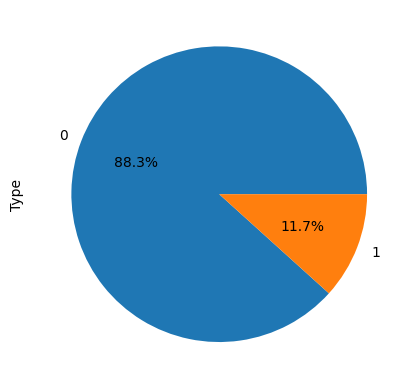

In [273]:
df.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')

In [274]:
dfyes = df[df['y'] == 1]
dfno = df[df['y'] == 0]

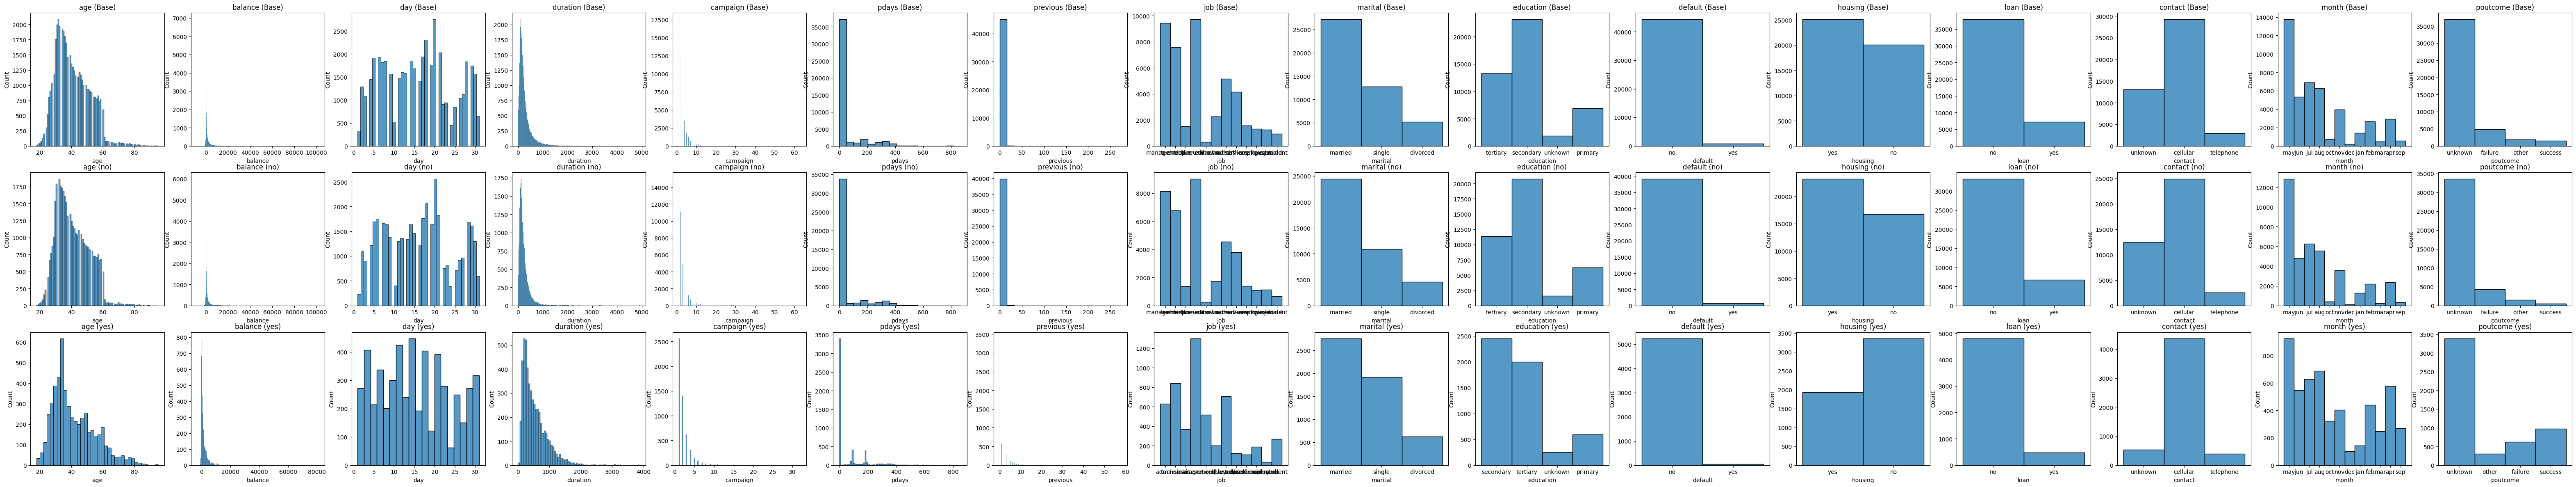

In [275]:
plt.figure(figsize=(80, 80))
for idx, col in enumerate(df.columns):
    if col != 'y':
        plt.subplot(16, 16, idx+1)
        sns.histplot(df[col], kde=False)
        plt.title(col + ' (Base)')
for idx, col in enumerate(dfyes.columns):
    if col != 'y':
        plt.subplot(16, 16, idx+len(dfno.columns))
        sns.histplot(dfno[col], kde=False)
        plt.title(col + ' (no)')
for idx, col in enumerate(dfno.columns):
    if col != 'y':
        plt.subplot(16, 16, idx+(len(dfno.columns)*2)-1)
        sns.histplot(dfyes[col], kde=False)
        plt.title(col + ' (yes)')
plt.savefig('img/AllHists.png', bbox_inches='tight')

From here, we will be taking some features that are noticeably different when plotting against output to re-plot it for better visualization.

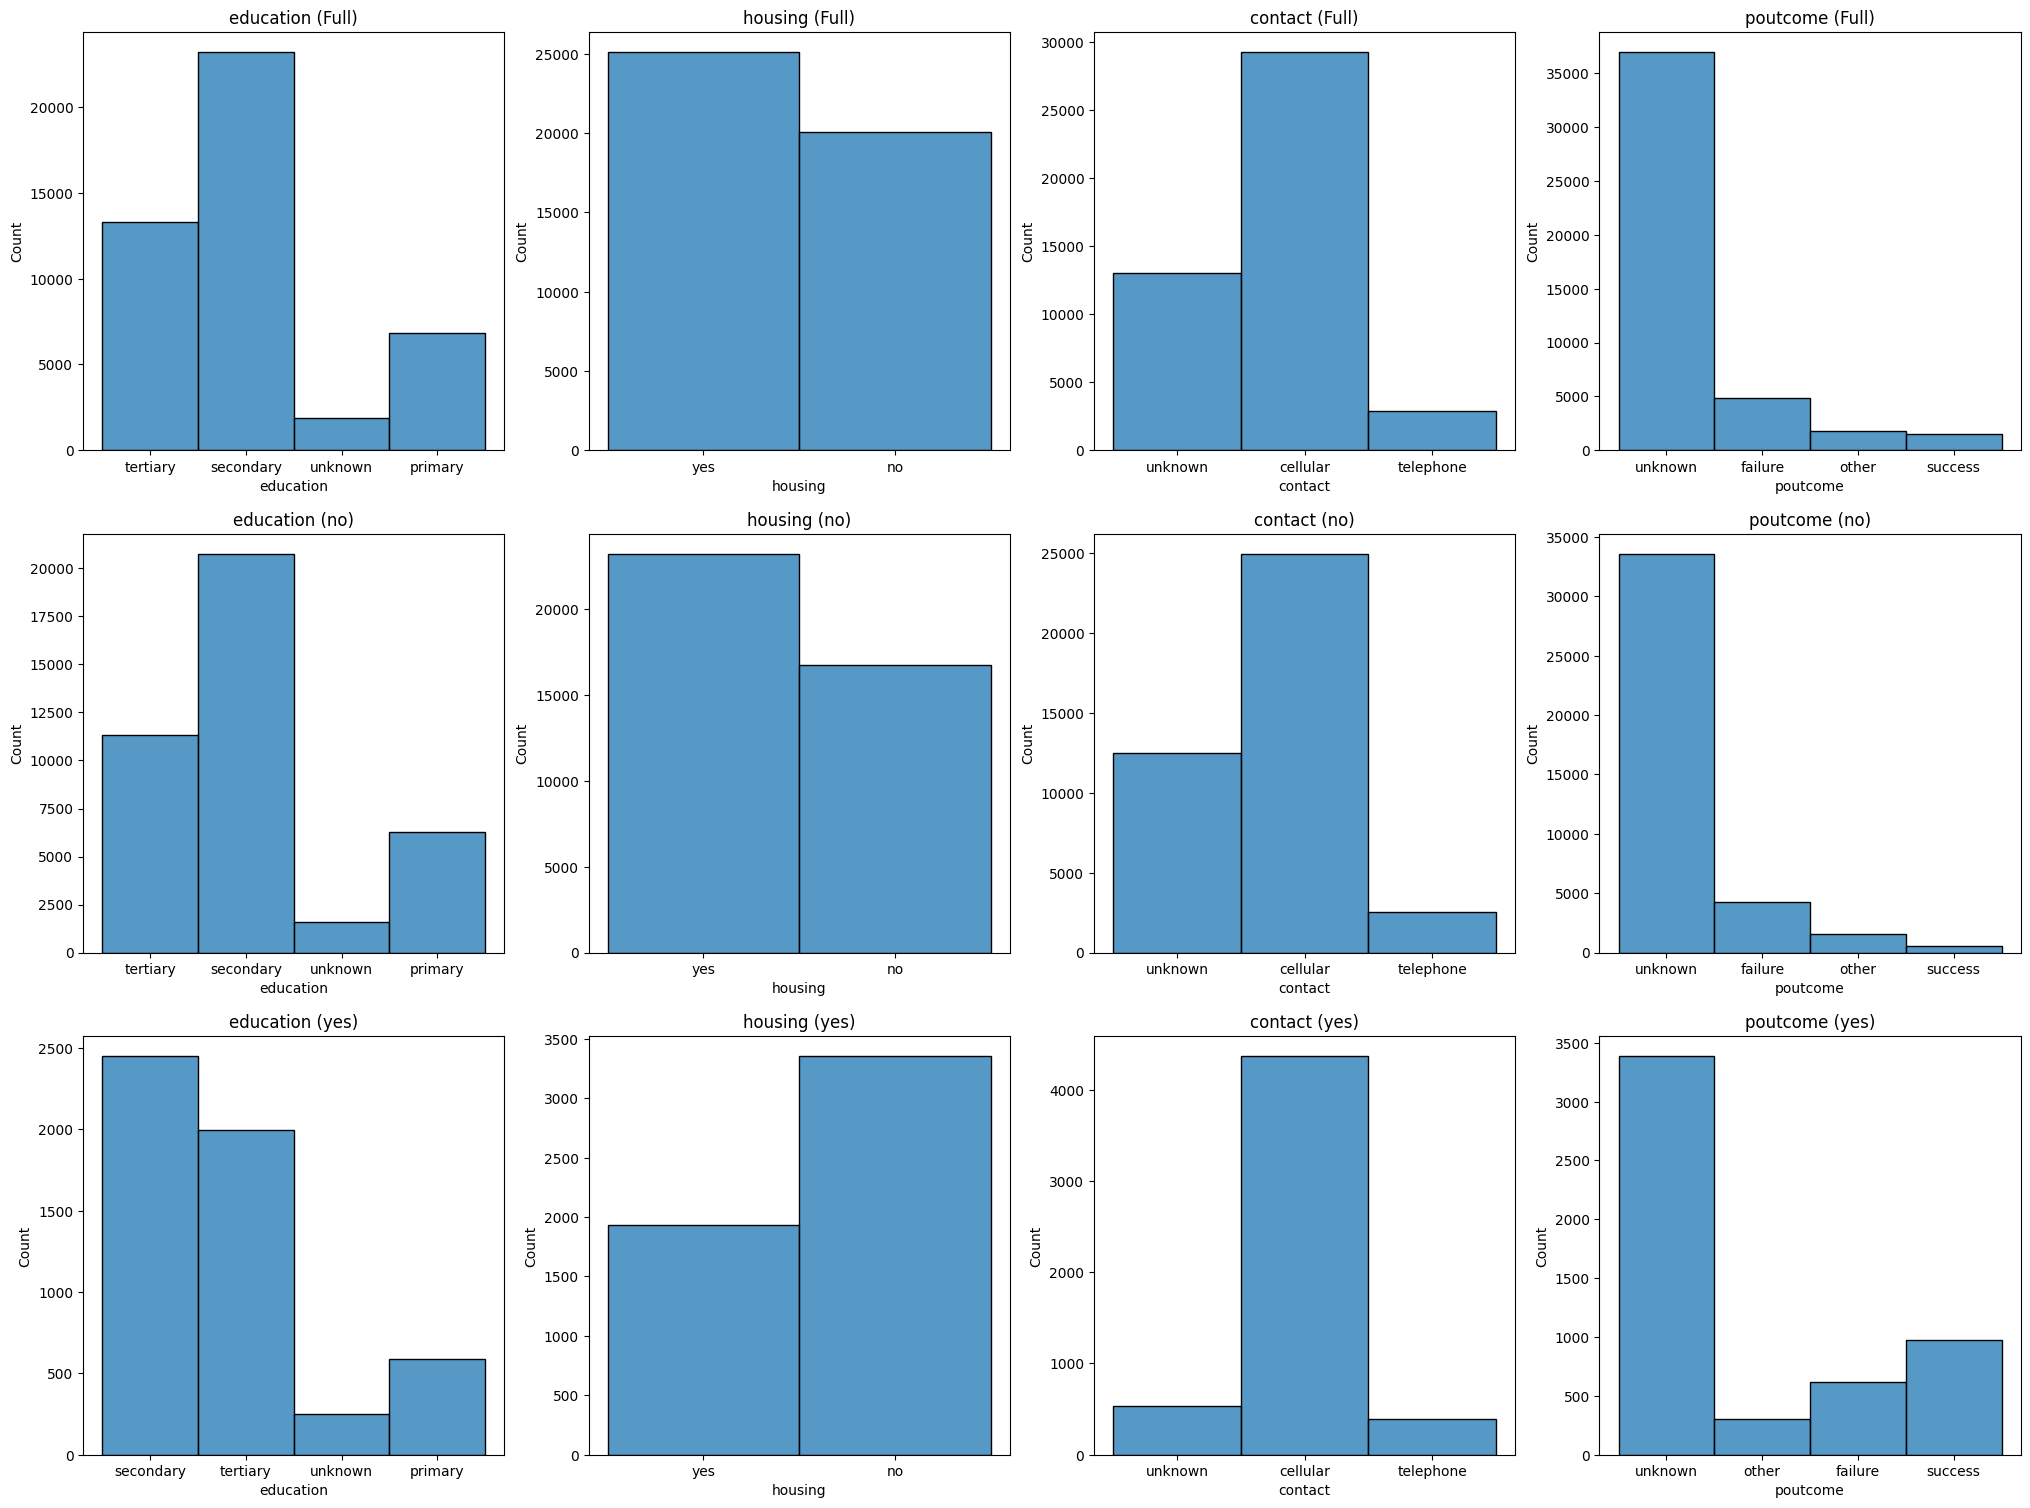

In [276]:
colToPlot = ['education', 'housing', 'contact', 'poutcome']
plt.figure(figsize=(25,25))
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1)
    sns.histplot(df[col], kde=False)
    plt.title(col + ' (Full)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+len(colToPlot)+1)
    sns.histplot(dfno[col], kde=False)
    plt.title(col + ' (no)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1+(len(colToPlot)*2))
    sns.histplot(dfyes[col], kde=False)
    plt.title(col + ' (yes)')
plt.savefig('img/SelectedHists.png', bbox_inches='tight')

We can see that these features have different charts when plotting against each output. Features plotted against output 'yes' have different bar charts compared to features plotted against all output data while features plotted against output 'no' has the same bar charts.

|Feature Names|Information|
|-|-|
|education|The client with 'secondary' education level has more chance to subscribe a term deposit|
|housing|The client with 'no' housing loan has more chance to subscribe a term deposit|
|contact|The client with 'unknown' communication type has more chance not to subscribe a term deposit|
|poutcome|The client with 'success' outcome of the previous marketing campaign has more chance to subscribe a term deposit|

#### **Pairplotting Data Samples**

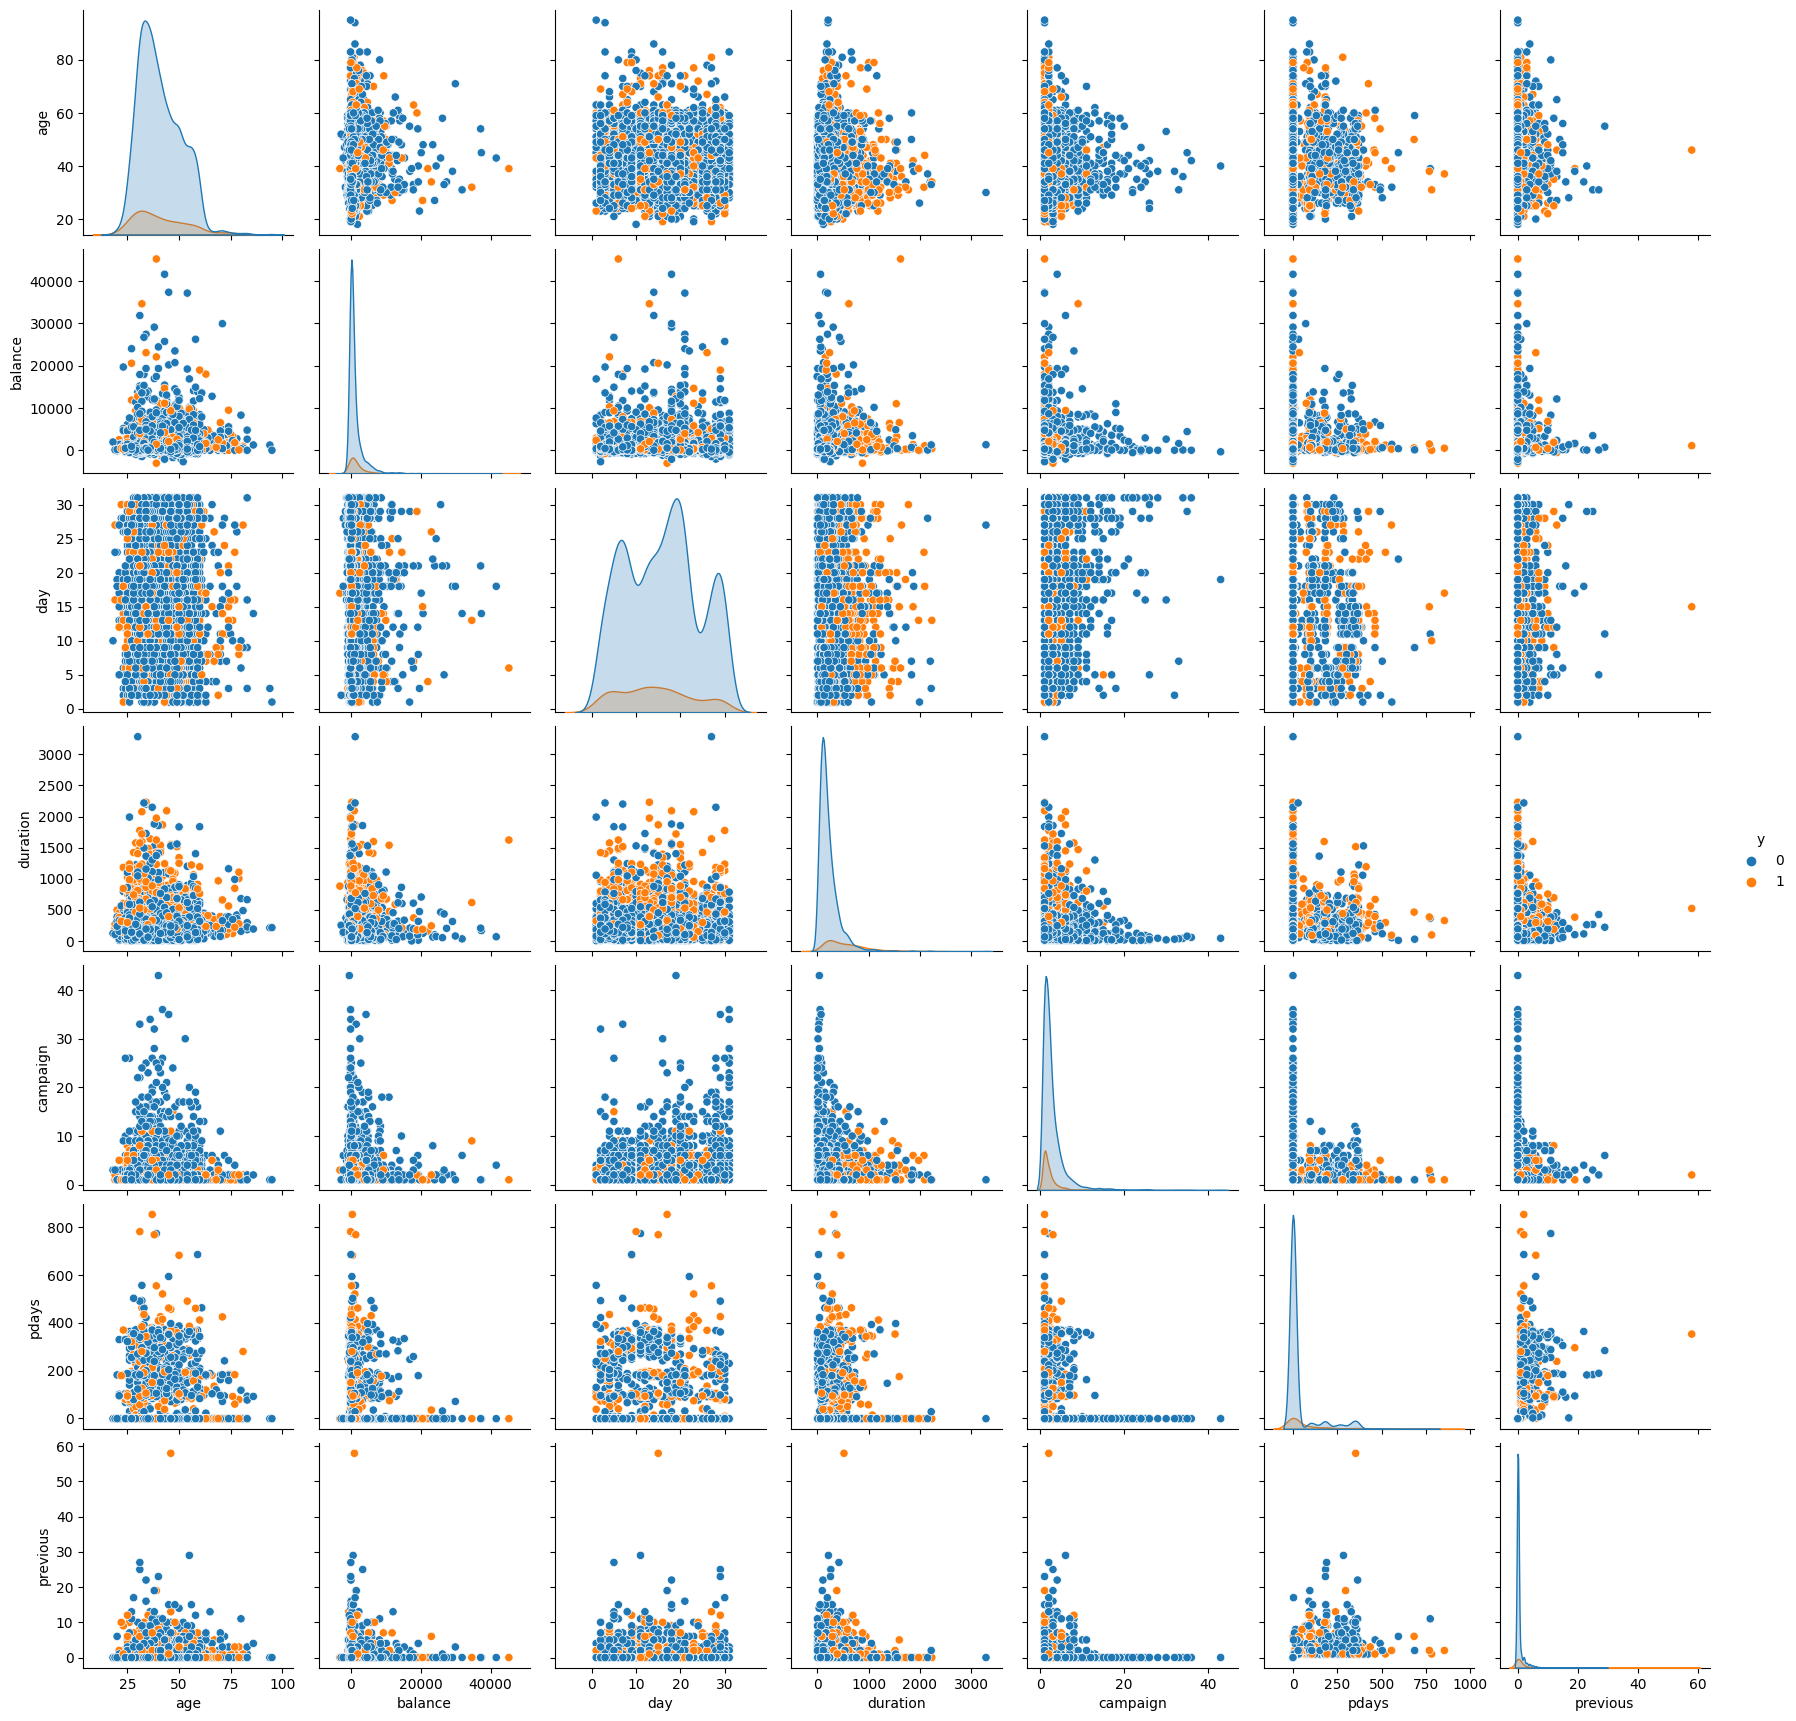

In [277]:
sns.pairplot(df.sample(int(df.shape[0]/10), random_state=777), diag_kind="kde", hue='y')
plt.savefig('img/PairplotSample.png', bbox_inches='tight')

As we can see when pairplotting, variance between features are quite low, so that we can't see the difference between 'no' and 'yes' output, variance within class are quite high in some feature.

#### **Check for Outliers**

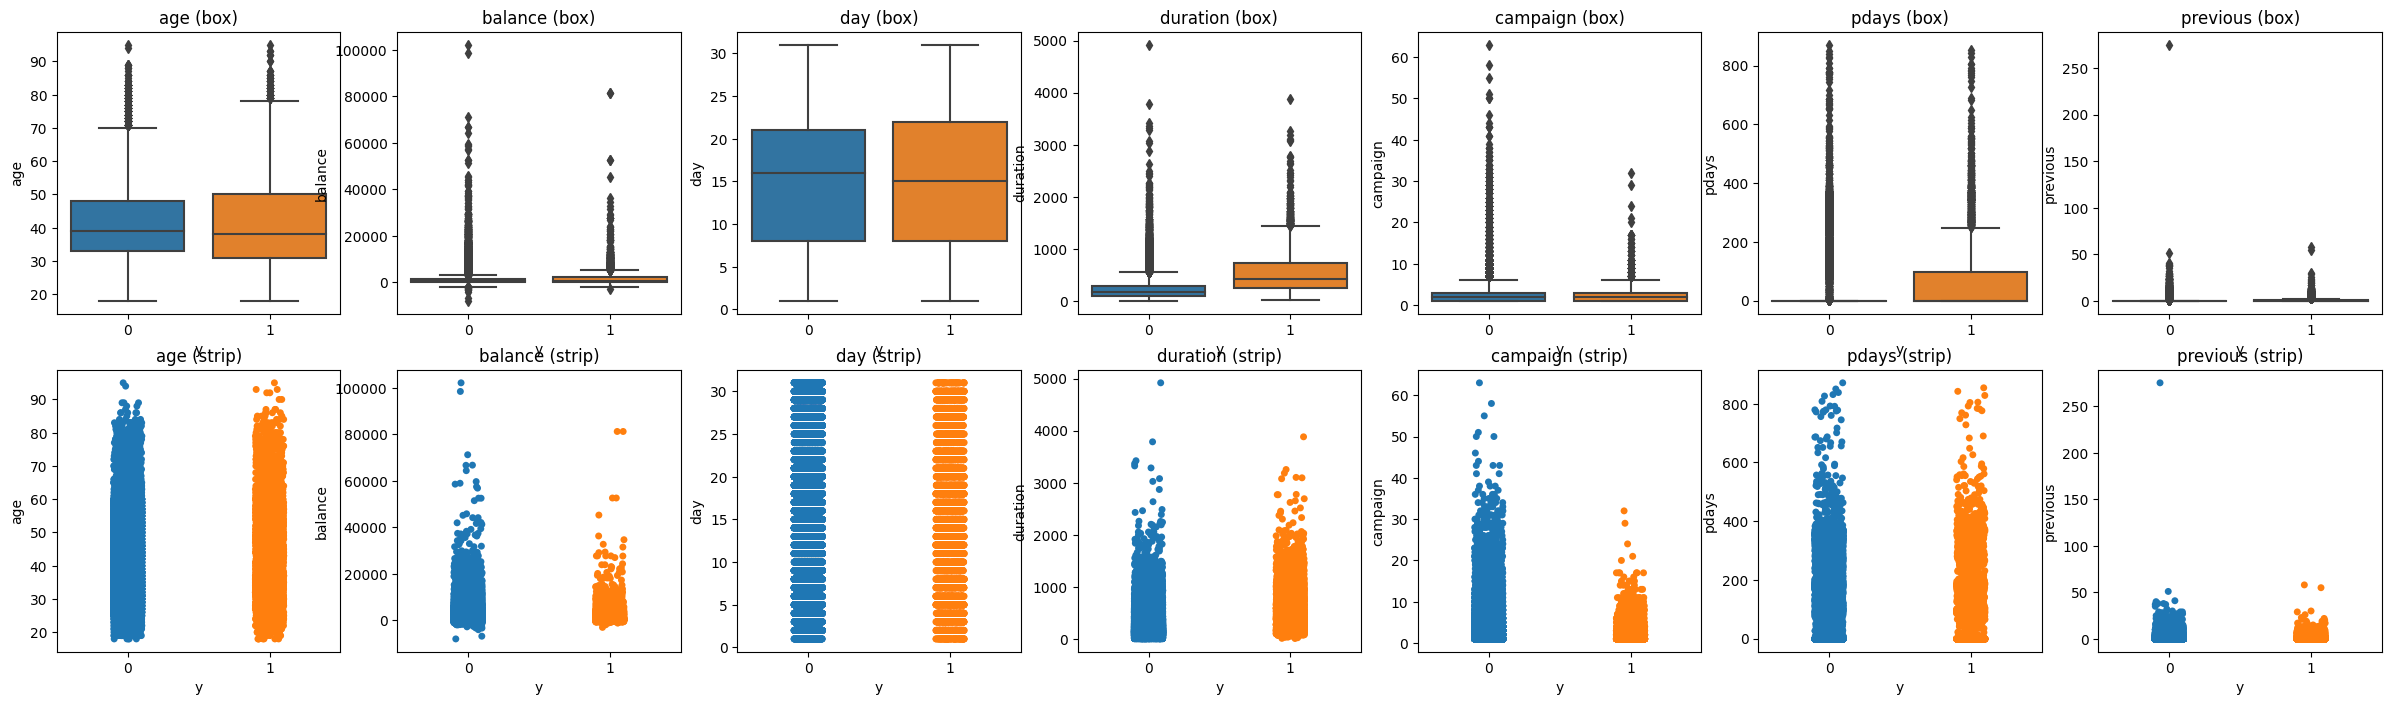

In [278]:
plt.figure(figsize=(30,30))
for idx, col in enumerate(dfNum.columns):
    plt.subplot(7, 7, idx+1)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(col + ' (box)')
for idx, col in enumerate(dfNum.columns):
    plt.subplot(7, 7, idx+len(dfNum.columns)+1)
    sns.stripplot(x="y", y=col, data=df)    
    plt.title(col + ' (strip)')
plt.savefig('img/BoxStrip.png', bbox_inches='tight')

From the plot above, outliers can be seen in the following features:
- balance
- duration
- campaign
- previous

We will remove the outliers at the start of data preprocessing.

### **Data Exploration's Conclusion**

From the overall report,

Plotting Histogram of Numerical Features:

|Feature Names|Distribution|
|-|-|
|age|Right-skewed|
|balance|Right-skewed|
|day|Uniform|
|duration|Right-skewed|
|campaign|Right-skewed|
|pdays|Right-skewed|
|previous|Right-skewed|

Plotting Values Count of Categorical Features:

|Feature Names|What we got|
|-|-|
|job|Most common jobs are 'blue-collar', 'management' and 'technician' (59.2% in total).|
|marital|60.2% of this data are 'Married', 28.3% are 'Single' and the rest are 'Divorced'|
|education|Mostly 'secondary' (51.3%) followed by 'tertiary' (29.4%), 'primary' (15.2%) and 'unknown' (4.1%)|
|default|Mostly 'false' (98.2%)|
|housing|55.6% are 'true' and the rest are 'false'|
|loan|Mostly 'false' (84%)|
|contact|Mostly 'cellular' (64.8%) followed by 'unknown' (28.8%) and 'telephone' (6.4%)|
|month|Mostly 'may' (30.4%)|
|poutcome|Mostly 'unknown' (81.7%) followed by 'failure' (10.8%), 'other' (4.1%) and 'success' (3.3%)|

Good things of this dataset:

|Good Things|Explanation|
|-|-|
|Filled Data in Numerical Features|There are no missing data (NaN) or unknown in numerical features of this dataset.|

Bad things of this dataset:

|Bad Things|Explanation|
|-|-|
|Data Explanation|Most features come with little to no explanation or bad explanation.|
|Data Distribution|There are no normal distributed data. Almost all of them are right-skewed.|
|Correlation|There are a lot of high correlation between features.|
|'poutcome' Features|This feature's data are mostly 'unknown' (around 81.7%).|
|Unknown Data|Unclear explanation of what unknown data means and there are a lot of them in categorical features.|
|Data Variation|As we can see when pairplotting, variance between features are quite low and variance within class are quite high in some feature, which means that data variation is very bad.|
|Output data|The output is imbalanced. ('1' is 11.7% and '0' is 88.3%)|

**NOTE**: For all 'Unknown' data in categorical features, we assumed 'Unknown' as a type of data because there are quite a lot of 'Unknown' data.

Furthermore, because we are dealing with a dataset from bank, those 'Unknown' data might be undisclosed information of the customers.

### **Hypothesis**
1. Outliers in features affects model's performance.
2. Imbalance data affects model's performance.
3. Right-skewed data affects model's performance.

<hr>

### **Benchmarking** (before data preprocessing)

In [279]:
#get the dummy variables for the categorical 
dfBM = df.copy()
dfBM = pd.get_dummies(dfBM, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xBM = dfBM.drop(['y'], axis = 1)
yBM = dfBM['y']

xBM_train, xBM_test, yBM_train, yBM_test = train_test_split(xBM, yBM, test_size = 0.2, random_state = 0)

### **Decision Tree Classifier**

In [280]:
DT_clf = DecisionTreeClassifier(random_state=0)
DT_clf.fit(xBM_train,yBM_train)
print('Train score: ', DT_clf.score(xBM_train, yBM_train))
print('Test score: ', DT_clf.score(xBM_test, yBM_test))

Train score:  1.0
Test score:  0.8700652438350105


#### **Predict using Test Data**

In [281]:
yDT_pred_test = DT_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yDT_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yDT_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7980
           1       0.45      0.47      0.46      1063

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043

Confusion matrix on Test data
[[7373  607]
 [ 568  495]]


### **Multi-Layer Perceptron Classifier**

In [282]:
MLP_clf = MLPClassifier(random_state=1)
MLP_clf.fit(xBM_train,yBM_train)
print('Train score: ', MLP_clf.score(xBM_train, yBM_train))
print('Test score: ', MLP_clf.score(xBM_test, yBM_test))

Train score:  0.8938840964388409
Test score:  0.8878690699988941


#### **Predict using Test Data**

In [283]:
yMLP_pred_test = MLP_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yMLP_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yMLP_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      7980
           1       0.52      0.49      0.51      1063

    accuracy                           0.89      9043
   macro avg       0.73      0.71      0.72      9043
weighted avg       0.88      0.89      0.89      9043

Confusion matrix on Test data
[[7511  469]
 [ 545  518]]


### **K-Nearest Neighbors**

In [284]:
KN_clf = KNeighborsClassifier(n_jobs=-1)
KN_clf.fit(xBM_train,yBM_train)
print('Train score: ', KN_clf.score(xBM_train, yBM_train))
print('Test score: ', KN_clf.score(xBM_test, yBM_test))

Train score:  0.9109710241097102
Test score:  0.8768107928784695


#### **Predict using Test Data**

In [285]:
yKN_pred_test = KN_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yKN_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yKN_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7980
           1       0.46      0.25      0.33      1063

    accuracy                           0.88      9043
   macro avg       0.68      0.61      0.63      9043
weighted avg       0.85      0.88      0.86      9043

Confusion matrix on Test data
[[7659  321]
 [ 793  270]]


### Benchmark Conclusion

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.87|Decision Tree|Test Data|
1|0.45|0.47|0.46|^|Decision Tree|Test Data|
0|0.94|0.92|0.93|0.88|MLP|Test Data|
1|0.50|0.59|0.54|^|MLP|Test Data|
0|0.91|0.96|0.93|0.88|K-Nearest|Test Data|
1|0.46|0.25|0.33|^|K-Nearest|Test Data|

<hr>

## **Data Preprocessing**

### **Experiment 1 : Remove Outliers**

#### **Hypothesis**
    
Outliers in features affects model's performance.

From the figure,

<img src='img/BoxStrip.png'/>

we will be removing outliers from the following features:
- balance
- duration
- campaign
- previous

In [286]:
dfEX1 = df.copy()

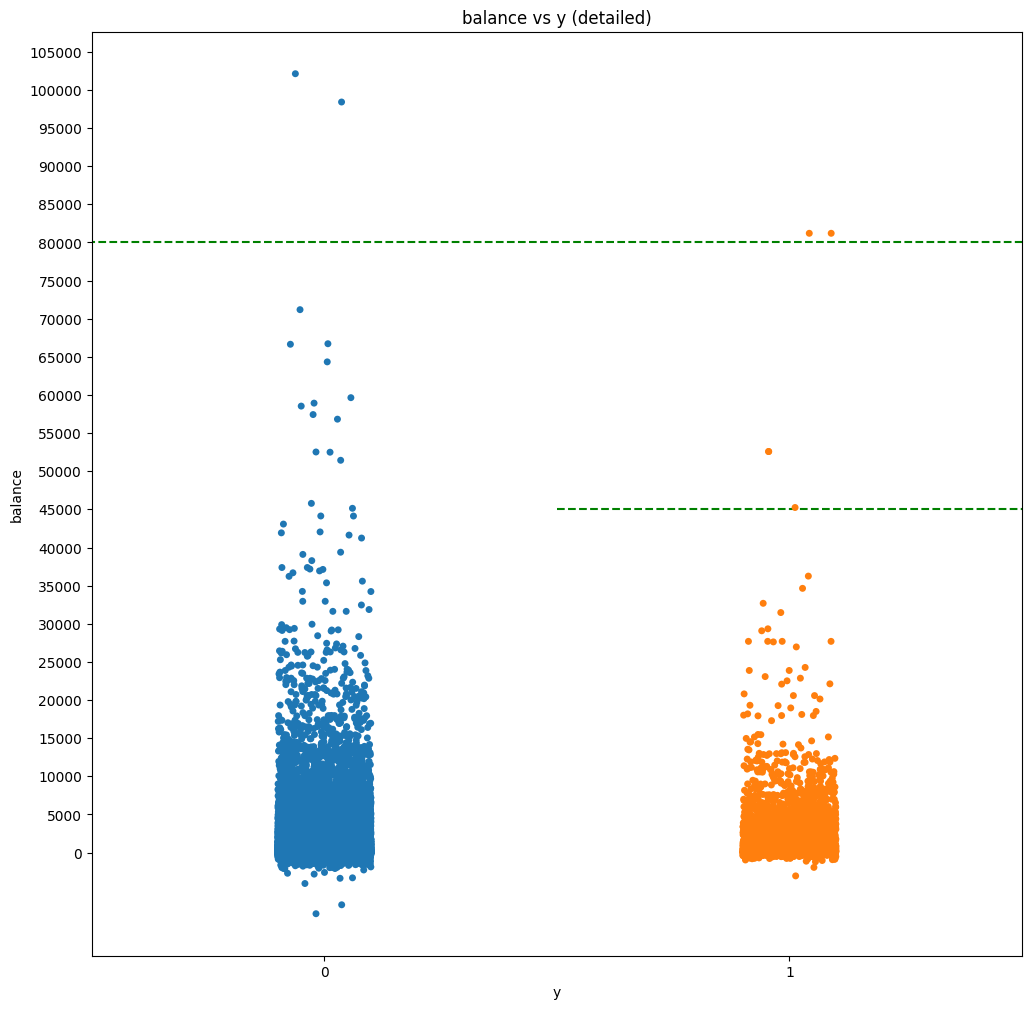

In [287]:
plt.figure(figsize=(12, 12))
plt.title('balance vs y (detailed)')
plt.yticks(np.arange(0, 120000, 5000))
plt.plot(np.arange(-1, 3, 1), np.full(4, 80000), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 45000), 'g--')
sns.stripplot(x="y", y="balance", data=dfEX1)
plt.savefig('img/balance-y-detailed.png', bbox_inches='tight')

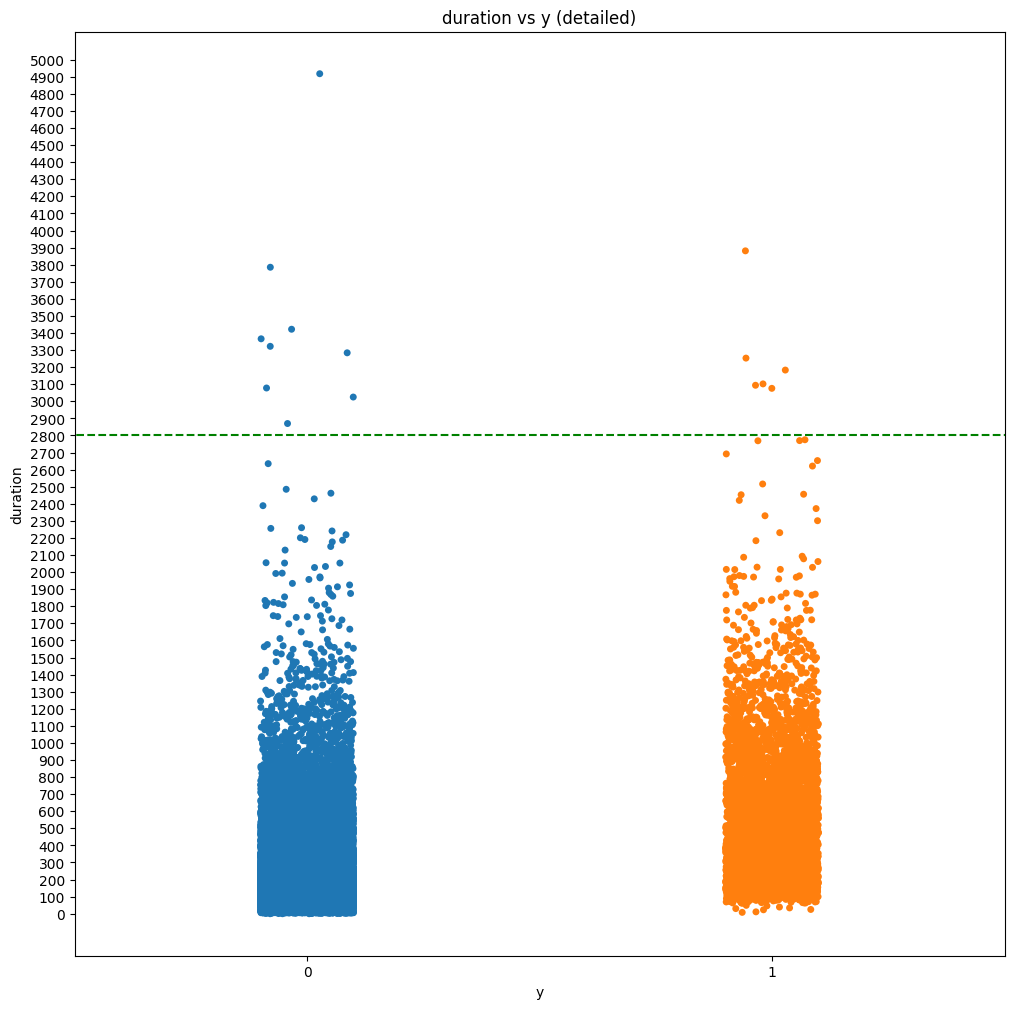

In [288]:
plt.figure(figsize=(12, 12))
plt.title('duration vs y (detailed)')
plt.yticks(np.arange(0, 5100, 100))
plt.plot(np.arange(-1, 3, 1), np.full(4, 2800), 'g--')
sns.stripplot(x="y", y="duration", data=dfEX1)
plt.savefig('img/duration-y-detailed.png', bbox_inches='tight')

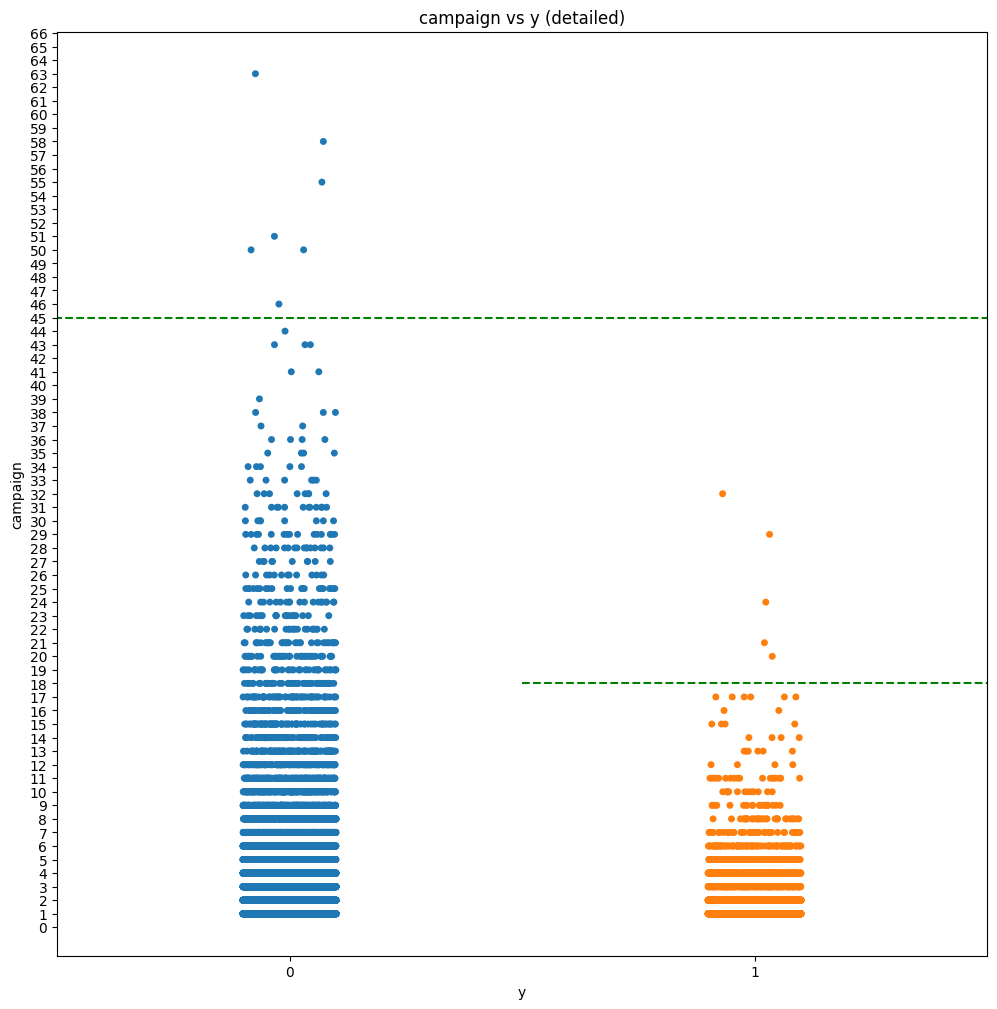

In [289]:
plt.figure(figsize=(12, 12))
plt.title('campaign vs y (detailed)')
plt.yticks(np.arange(0, 70, 1))
plt.plot(np.arange(-1, 3, 1), np.full(4, 45), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 18), 'g--')
sns.stripplot(x="y", y="campaign", data=dfEX1)
plt.savefig('img/campaign-y-detailed.png', bbox_inches='tight')

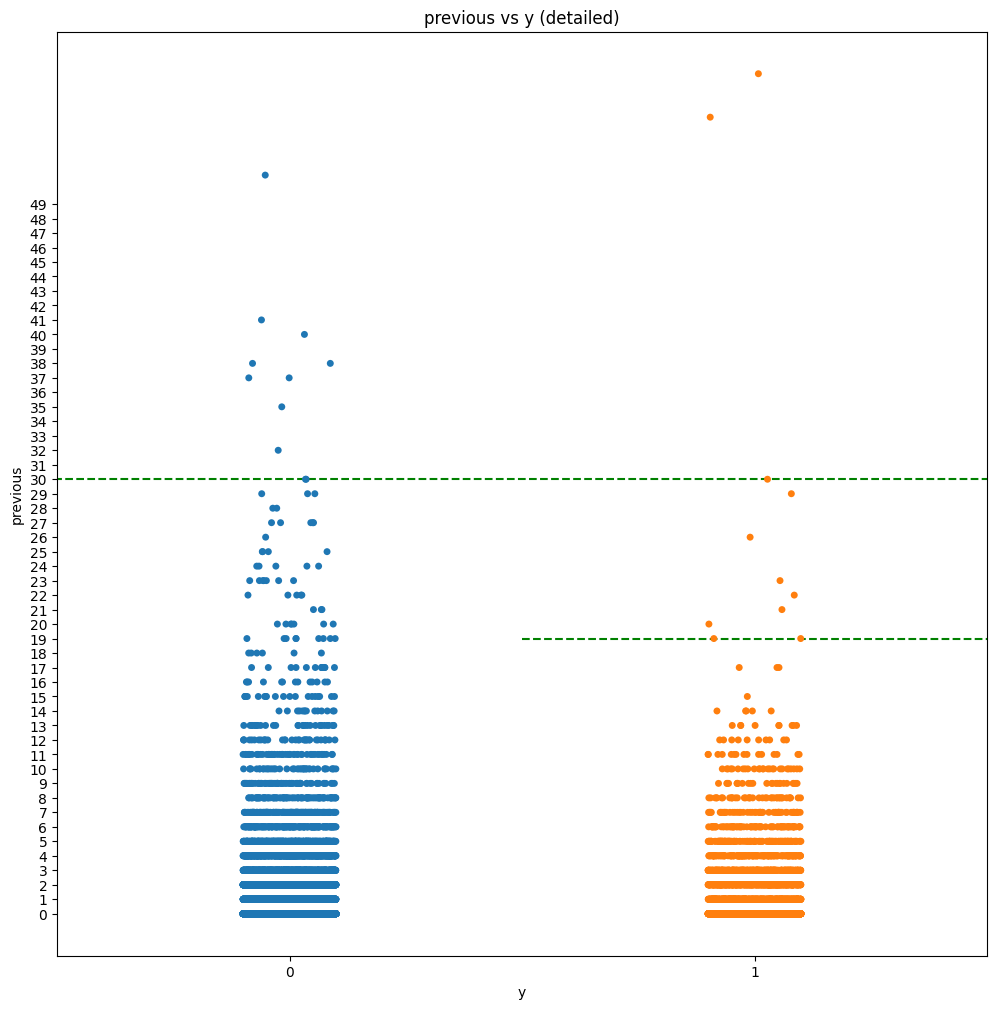

In [290]:
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] > 60].index)
plt.figure(figsize=(12, 12))
plt.title('previous vs y (detailed)')
plt.yticks(np.arange(0, 50, 1))
plt.plot(np.arange(-1, 3, 1), np.full(4, 30), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 19), 'g--')
sns.stripplot(x="y", y="previous", data=dfEX1)
plt.savefig('img/previous-y-detailed.png', bbox_inches='tight')

In [291]:
dfEX1 = dfEX1.drop(dfEX1[dfEX1['balance'] >= 50000].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['balance'] >= 45000].index & dfEX1[dfEX1['y'] == 1].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['duration'] >= 2800].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['campaign'] >= 45].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['campaign'] >= 18].index & dfEX1[dfEX1['y'] == 1].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] >= 30].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] >= 19].index & dfEX1[dfEX1['y'] == 1].index)

dfEX1.shape

(45142, 17)

After removing outliers, we are left with <u>**45142 instances**</u> (originally 45211 instances).

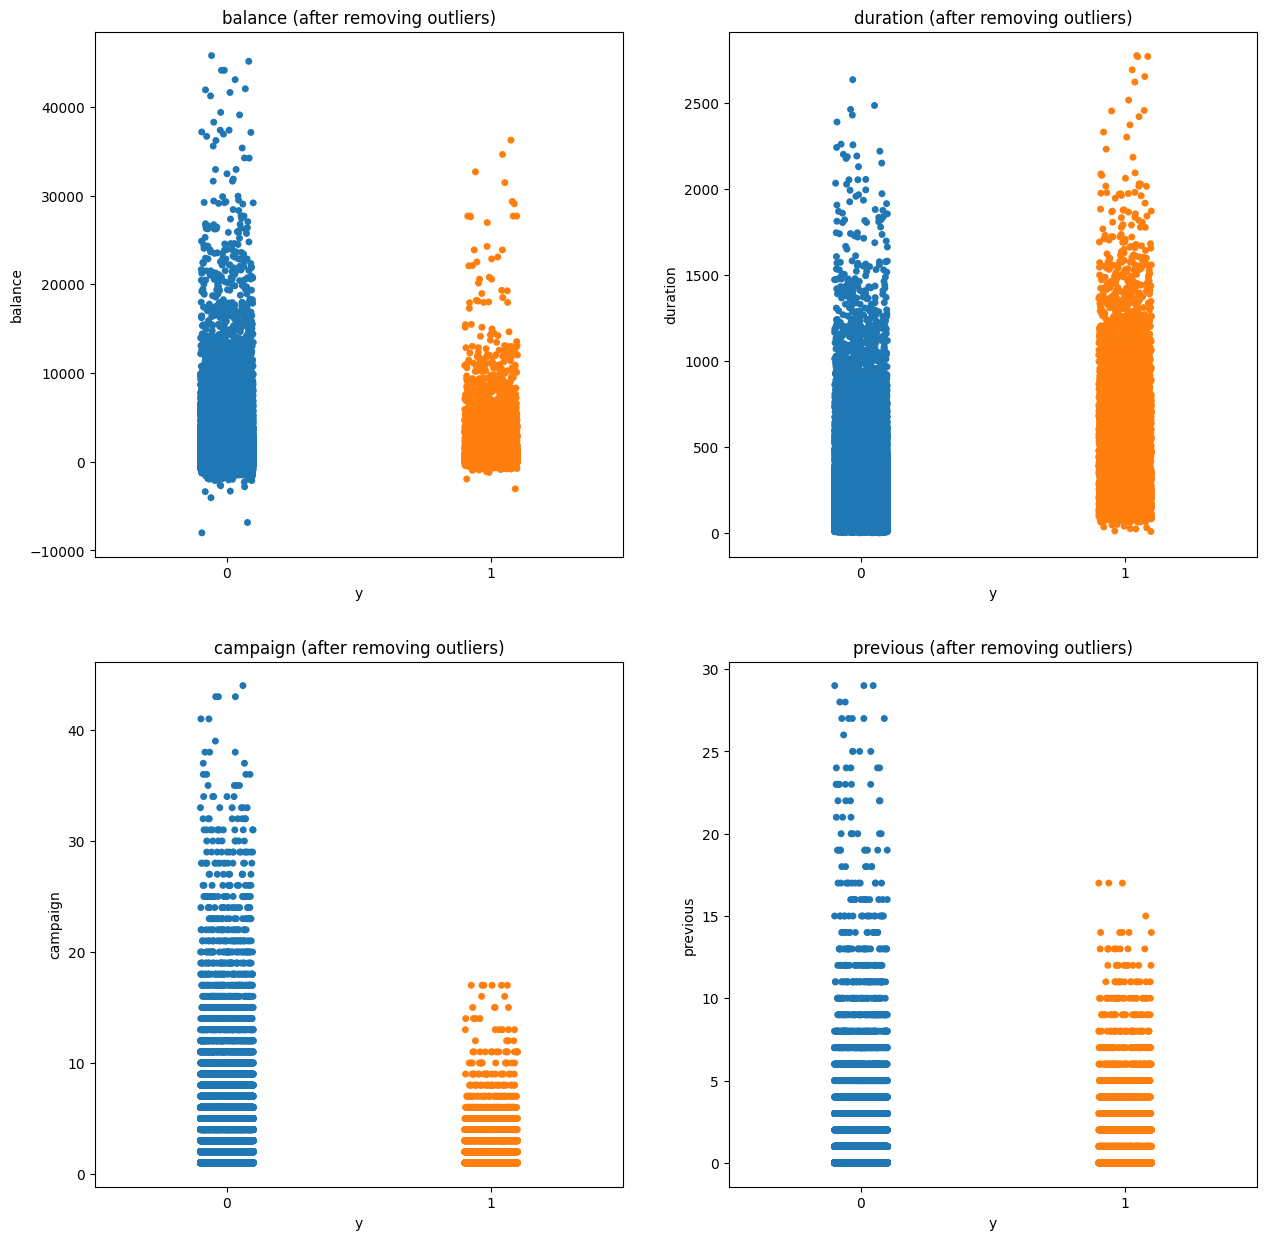

In [292]:
plt.figure(figsize=(15, 15))
for idx, col in enumerate(['balance', 'duration', 'campaign', 'previous']):
    plt.subplot(2, 2, idx+1)
    sns.stripplot(x='y', y=col, data=dfEX1)
    plt.title(col + ' (after removing outliers)')
plt.savefig('img/SelectedHists-After.png', bbox_inches='tight')

<hr>

#### **Benchmarking** (Remove Outliers)

In [293]:
#get the dummy variables for the categorical 
dfEX1_BM = dfEX1.copy()
dfEX1_BM = pd.get_dummies(dfEX1_BM, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xEX1 = dfEX1_BM.drop(['y'], axis = 1)
yEX1 = dfEX1_BM['y']

xEX1_train, xEX1_test, yEX1_train, yEX1_test = train_test_split(xEX1, yEX1, test_size = 0.2, random_state = 0)

##### **Decision Tree Classifier**

In [294]:
DT_clf_Ex1 = DecisionTreeClassifier(random_state=0)
DT_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', DT_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', DT_clf_Ex1.score(xEX1_test, yEX1_test))

Train score:  1.0
Test score:  0.8827112637058367


In [295]:
yDT_pred_test = DT_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yDT_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yDT_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7965
           1       0.50      0.51      0.51      1064

    accuracy                           0.88      9029
   macro avg       0.72      0.72      0.72      9029
weighted avg       0.88      0.88      0.88      9029

Confusion matrix on Test data
[[7426  539]
 [ 520  544]]


##### **Multi-Layer Perceptron Classifier**

In [296]:
MLP_clf_Ex1 = MLPClassifier(random_state=1)
MLP_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', MLP_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', MLP_clf_Ex1.score(xEX1_test, yEX1_test))

Train score:  0.8971561487552959
Test score:  0.8917931110864991


In [297]:
yMLP_pred_test = MLP_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yMLP_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yMLP_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7965
           1       0.55      0.42      0.48      1064

    accuracy                           0.89      9029
   macro avg       0.74      0.69      0.71      9029
weighted avg       0.88      0.89      0.89      9029

Confusion matrix on Test data
[[7602  363]
 [ 614  450]]


##### **K-Nearest Neighbors**

In [298]:
KN_clf_Ex1 = KNeighborsClassifier(n_jobs=-1)
KN_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', KN_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', KN_clf_Ex1.score(xEX1_test, yEX1_test))

Train score:  0.9108908149419876
Test score:  0.8800531620334477


In [299]:
yKN_pred_test = KN_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yKN_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yKN_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7965
           1       0.48      0.27      0.34      1064

    accuracy                           0.88      9029
   macro avg       0.70      0.61      0.64      9029
weighted avg       0.86      0.88      0.86      9029

Confusion matrix on Test data
[[7661  304]
 [ 779  285]]


#### **Conclusion**

from the result of this Experiment we can compare 

1. Decision Tree  

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.93|0.92|0.93|0.87|Decision Tree|Test Data|
|1|0.45|0.47|0.46|^|Decision Tree|Test Data|
|0|0.93|0.93|0.93|0.90|Decision Tree|Test Ex1 Data|
|1|0.50|0.51|0.51|^|Decision Tree|Test Ex1 Data|

2. MLP  

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.93|0.94|0.94|0.89|MLP|Test Data|
|1|0.52|0.49|0.51|^|MLP|Test Data|
|0|0.93|0.95|0.94|0.89|MLP|Test Ex1 Data|
|1|0.55|0.42|0.48|^|MLP|Test Ex1 Data|

3. K-Nearest  

|Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|0|0.91|0.96|0.93|0.88|K-Nearest|Test Data|
|1|0.46|0.25|0.33|^|K-Nearest|Test Data|
|0|0.91|0.96|0.93|0.88|K-Nearest|Test Ex1 Data|
|1|0.48|0.27|0.34|^|K-Nearest|Test Ex1 Data|
 
from the result above, เราจะสามารถเห็นได้ว่าการตัด outlier ออกจาก Data ของเราสามารถทำให้ประสิทธภาพในการ Train Model ของเรามากขึ้นดังนั้นแล้วเราจะพิจารณการตัด Outlier ทิ้ง

In [300]:
df = dfEX1.copy()

### **Experiment 2 : Data Imbalance**

#### **Hypothesis**
    
Imbalance data affects model's performance.

y
0    39880
1     5262
dtype: int64


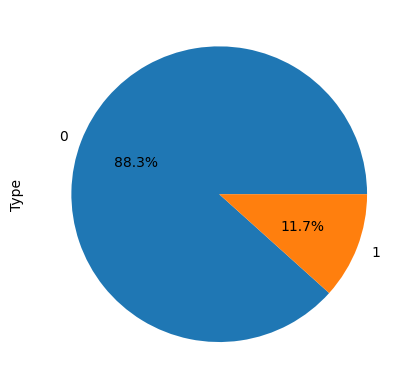

In [301]:
df.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(df.groupby('y').size())

In [302]:
dfDI = df.copy()
dfDI = LE_pipeline.fit_transform(dfDI)

xdi_train , xdi_test , ydi_train , ydi_test = train_test_split(dfDI.drop(['y'], axis = 1), dfDI['y'], test_size = 0.2, random_state = 0)

In [303]:
dfDI.head()

age  balance  day  duration  campaign  pdays  previous  default  housing  \
0   58     2143    5       261         1     -1         0        0        1   
1   44       29    5       151         1     -1         0        0        1   
2   33        2    5        76         1     -1         0        0        1   
3   47     1506    5        92         1     -1         0        0        1   
4   33        1    5       198         1     -1         0        0        0   

   loan  ...  education_secondary  education_tertiary  education_unknown  \
0     0  ...                    0                   1                  0   
1     0  ...                    1                   0                  0   
2     1  ...                    1                   0                  0   
3     0  ...                    0                   0                  1   
4     0  ...                    0                   0                  1   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   
3                 0                  0                1                 0   
4                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
4               0                 0                 1  

[5 rows x 38 columns]

So, We consider to use 6 different methods to address the imbalance data problem.
1. Random Oversampling
2. SMOTE
3. ADASYN
4. Random Undersampling
5. InstanceHardnessThreshold
6. NearMiss

#### **Random Oversampling**

In [304]:
ros = RandomOverSampler(random_state=0)
x_ros, y_ros = ros.fit_resample(xdi_train, ydi_train)
dfDI_Ros = pd.concat([x_ros, y_ros], axis=1)

y
0    31915
1    31915
dtype: int64


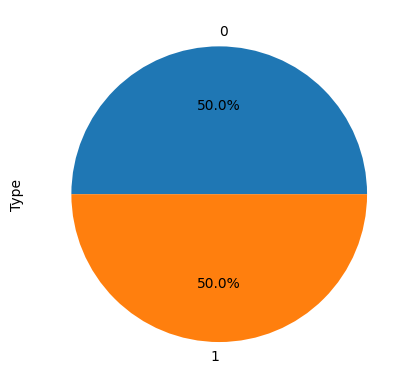

In [305]:
dfDI_Ros.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_Ros.groupby('y').size())

#### **SMOTE**

In [306]:
smote = SMOTE(random_state=0)
x_su, y_su = smote.fit_resample(xdi_train, ydi_train)
dfDI_SM = pd.concat([x_su, y_su], axis=1)

y
0    31915
1    31915
dtype: int64


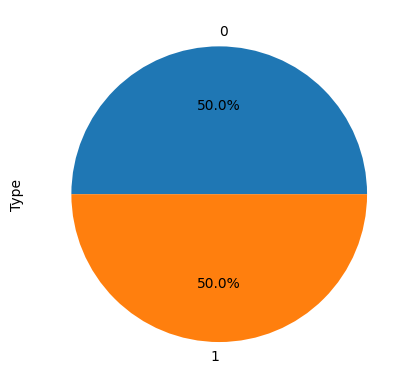

In [307]:
dfDI_SM.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_SM.groupby('y').size())

#### **ADASYN**

In [308]:
adasyb = ADASYN(random_state=0)
x_ad, y_ad = adasyb.fit_resample(xdi_train, ydi_train)
dfDI_AD = pd.concat([x_ad, y_ad], axis=1)

y
0    31915
1    32710
dtype: int64


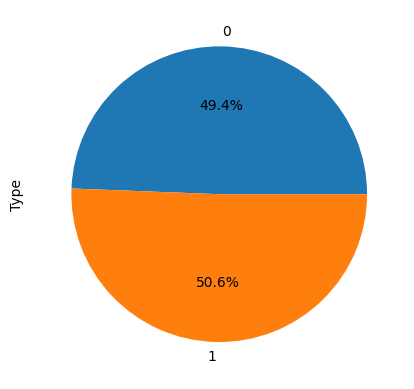

In [309]:
dfDI_AD.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_AD.groupby('y').size())

#### **Random Undersampling**

In [310]:
rus = RandomUnderSampler(random_state=0)
x_rus , y_rus = rus.fit_resample(xdi_train, ydi_train)
dfDI_RUS = pd.concat([x_rus, y_rus], axis=1)

y
0    4198
1    4198
dtype: int64


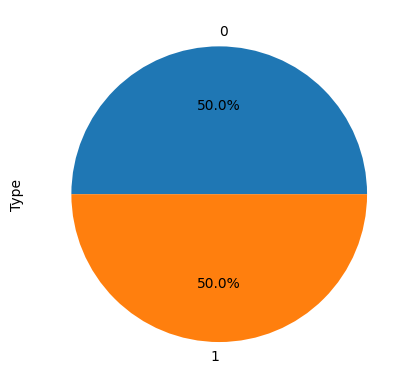

In [311]:
dfDI_RUS.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_RUS.groupby('y').size())

#### **InstanceHardnessThreshold**

In [312]:
instanace = InstanceHardnessThreshold(n_jobs=-1)
x_iht , y_iht = instanace.fit_resample(xdi_train, ydi_train)
dfDI_IHT = pd.concat([x_iht, y_iht], axis=1)

y
0    10073
1     4198
dtype: int64


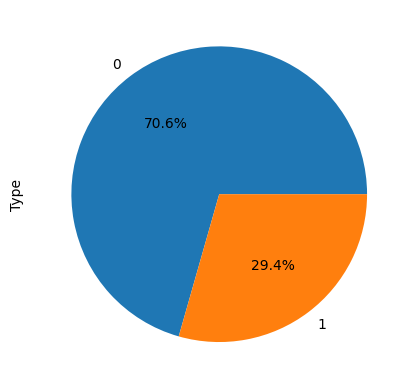

In [313]:
dfDI_IHT.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_IHT.groupby('y').size())

#### **NearMiss**

In [314]:
nearMiss = NearMiss(n_jobs=-1)
x_nearM , y_nearM = nearMiss.fit_resample(xdi_train, ydi_train)
dfDI_NearM = pd.concat([x_nearM, y_nearM], axis=1)

y
0    4198
1    4198
dtype: int64


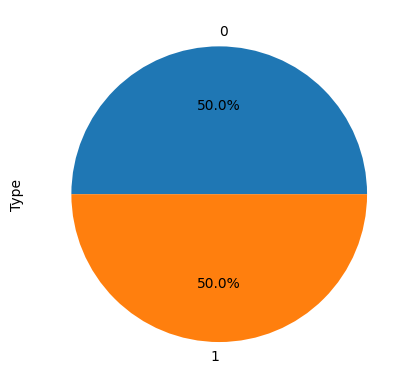

In [315]:
dfDI_NearM.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')
print(dfDI_NearM.groupby('y').size())

#### **Histogram Comparison**

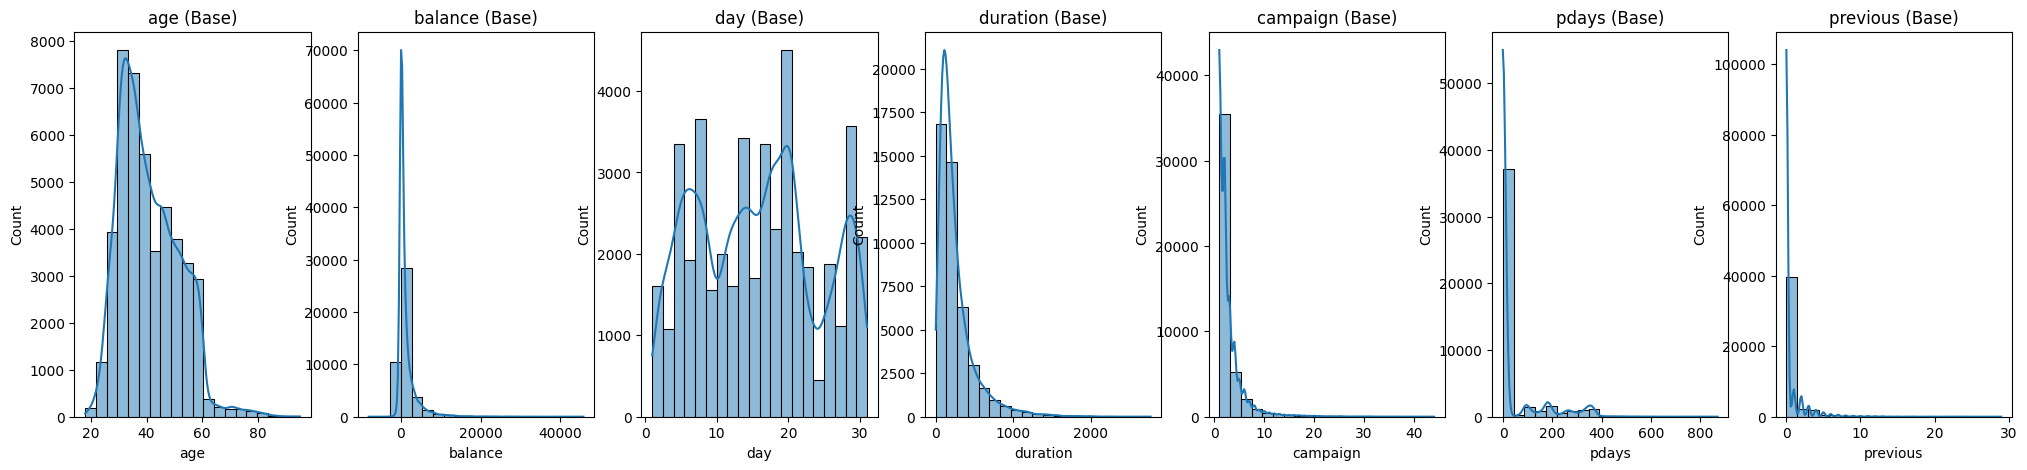

In [316]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(df[col], kde=True,bins=20)
        plt.title(col + ' (Base)')

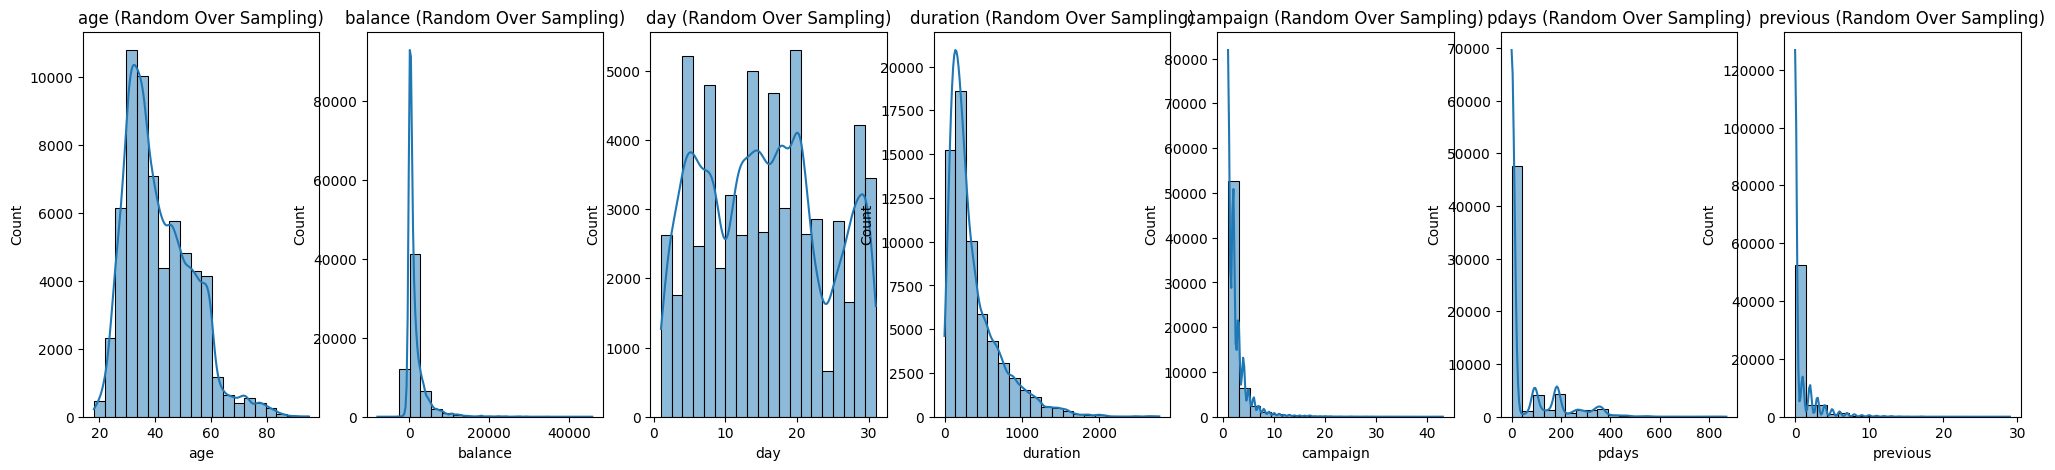

In [317]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_Ros[col], kde=True,bins=20)
        plt.title(col + ' (Random Over Sampling)')

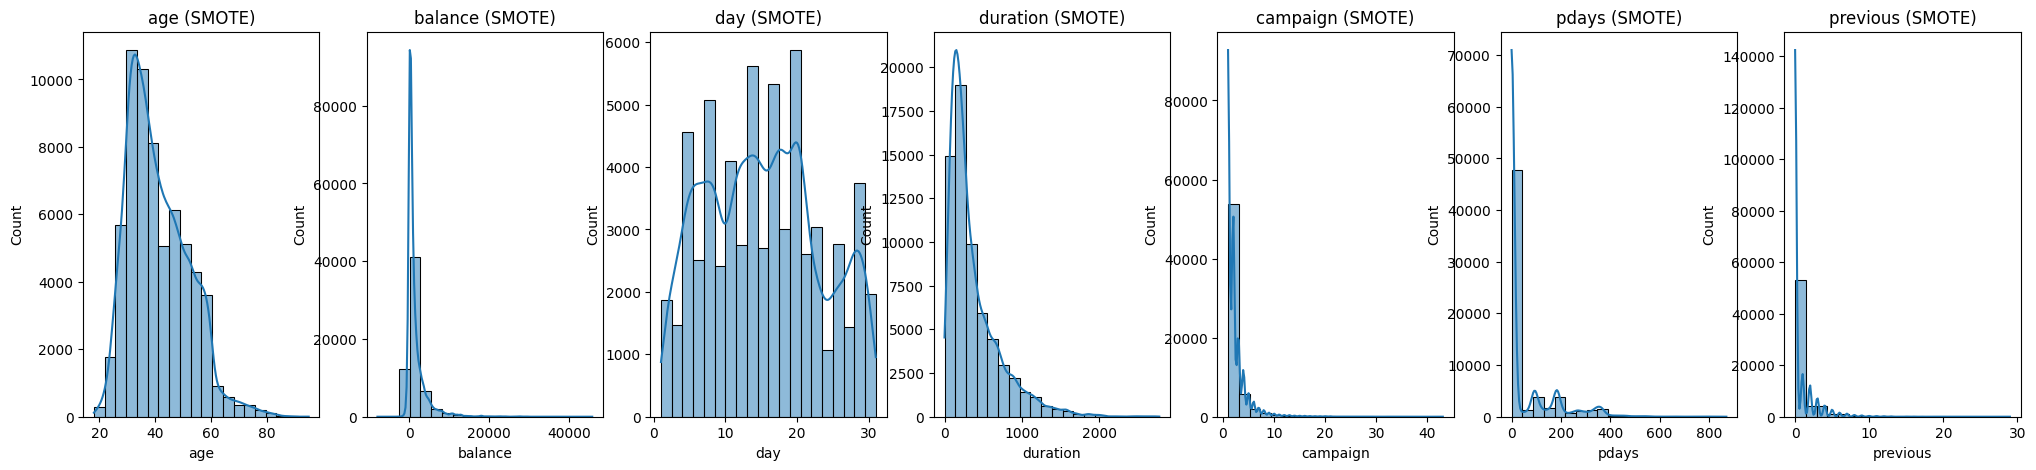

In [318]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_SM[col], kde=True,bins=20)
        plt.title(col + ' (SMOTE)')

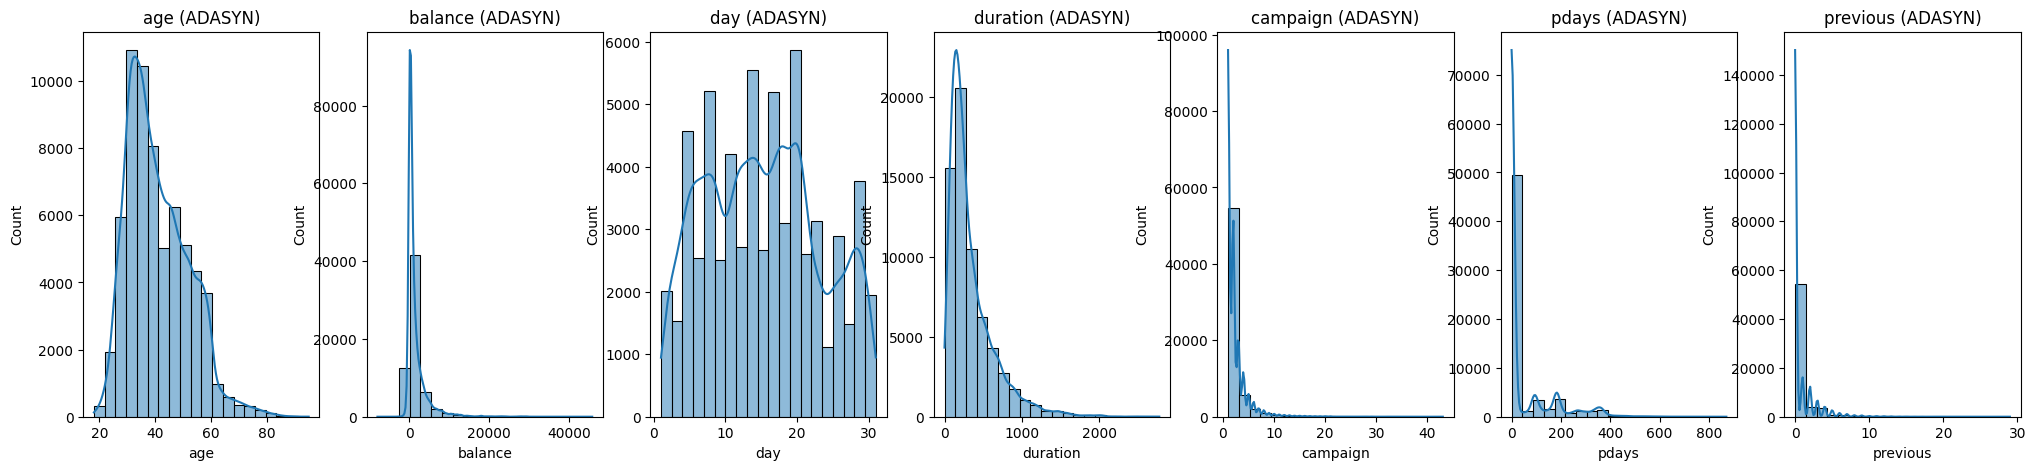

In [319]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_AD[col], kde=True,bins=20)
        plt.title(col + ' (ADASYN)')

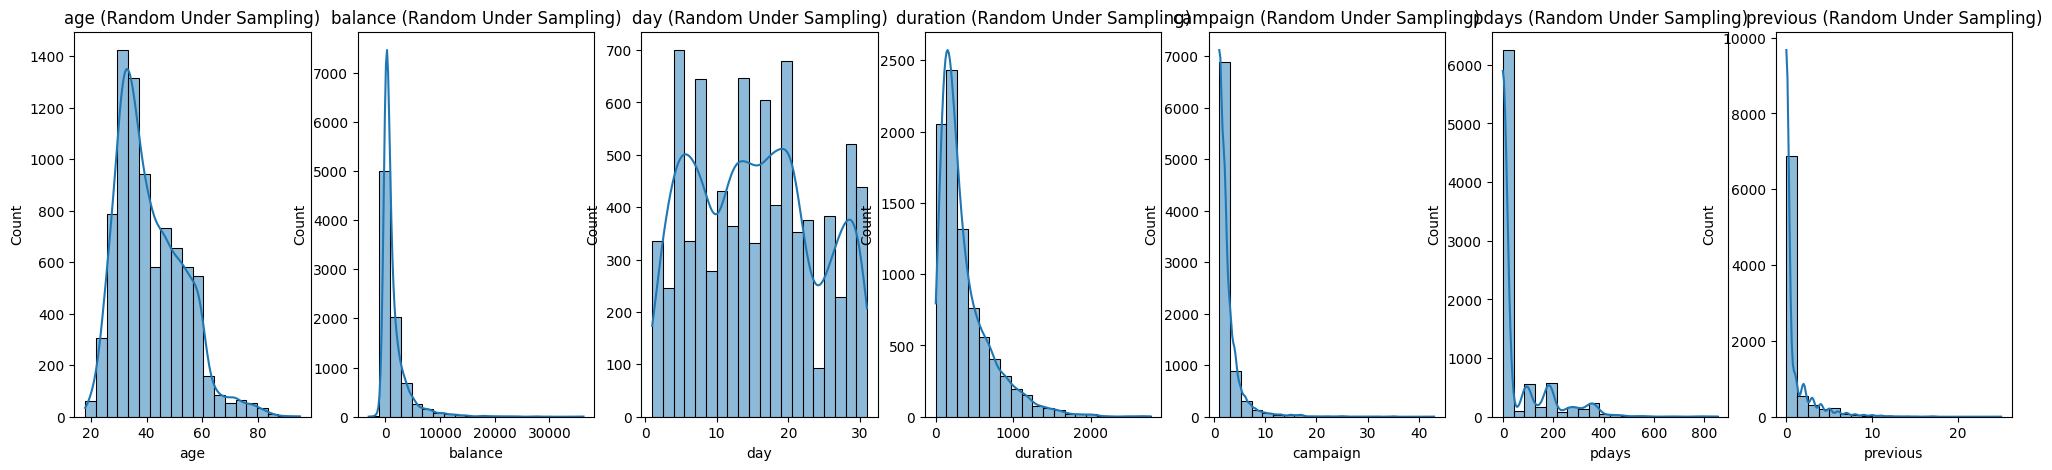

In [320]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_RUS[col], kde=True,bins=20)
        plt.title(col + ' (Random Under Sampling)')

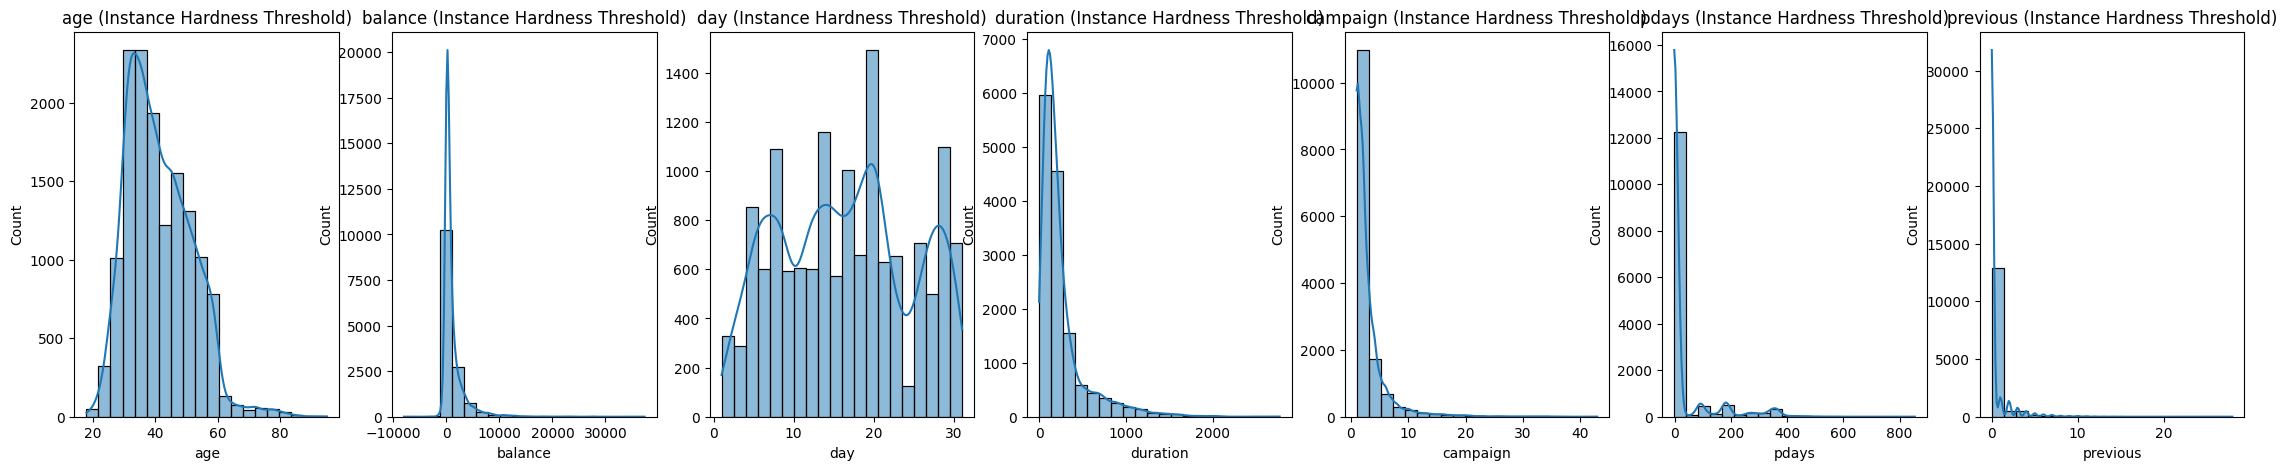

In [321]:
plt.figure(figsize=(28, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_IHT[col], kde=True,bins=20)
        plt.title(col + ' (Instance Hardness Threshold)')

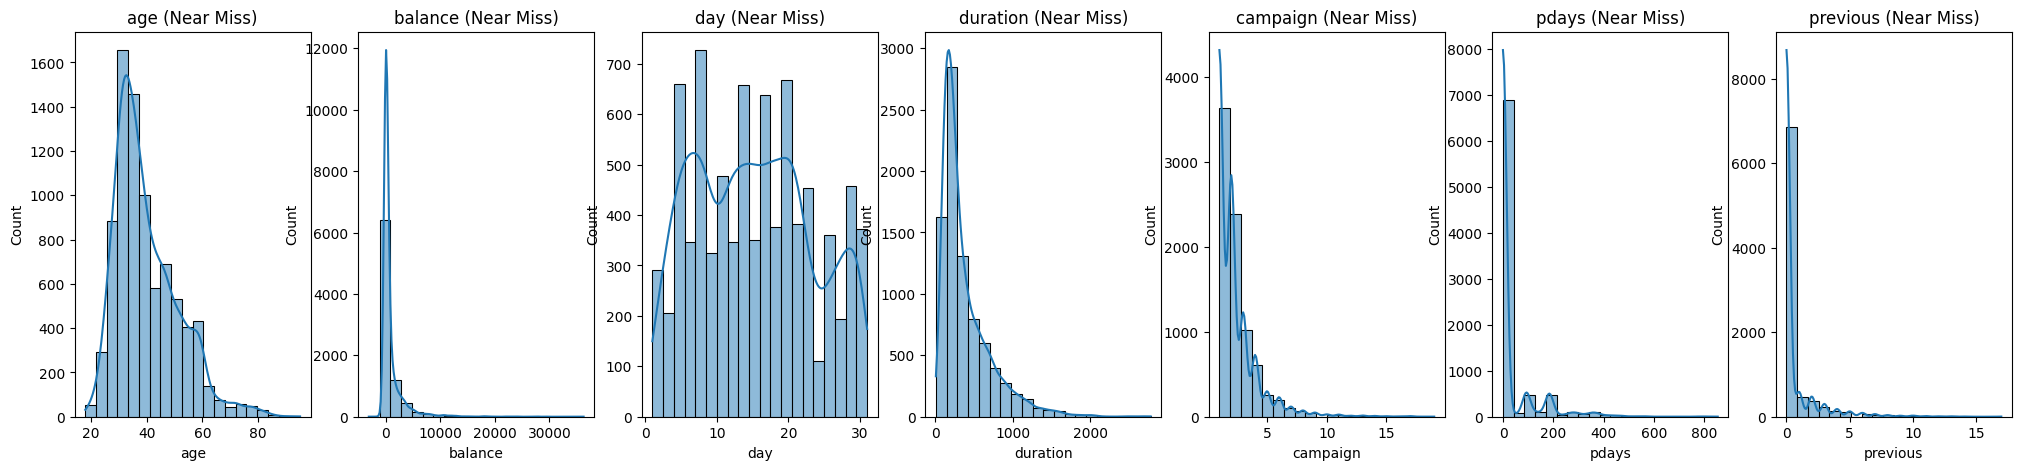

In [322]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(dfDI_NearM[col], kde=True,bins=20)
        plt.title(col + ' (Near Miss)')

We can see that in some features(duration,day), the data not have the same distribution as the original data.

#### **Model Training**

In [323]:
DT_clf_Ex2_Base = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_Base = MLPClassifier(random_state=1)
KN_clf_Ex2_Base = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_Base.fit(xdi_train, ydi_train)
MLP_clf_Ex2_Base.fit(xdi_train, ydi_train)
KN_clf_Ex2_Base.fit(xdi_train, ydi_train)
print("Decision Tree Classifier Base: ", DT_clf_Ex2_Base.score(xdi_test, ydi_test))
print("MLP Classifier Base: ", MLP_clf_Ex2_Base.score(xdi_test, ydi_test))
print("KNeighbors Classifier Base: ", KN_clf_Ex2_Base.score(xdi_test, ydi_test))

Decision Tree Classifier Base:  0.8791671281426514
MLP Classifier Base:  0.8704175434710377
KNeighbors Classifier Base:  0.8801639162697973


In [324]:
yDI_pred_test1 = DT_clf_Ex2_Base.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_Base.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_Base.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7965
           1       0.49      0.51      0.50      1064

    accuracy                           0.88      9029
   macro avg       0.71      0.72      0.71      9029
weighted avg       0.88      0.88      0.88      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7965
           1       0.46      0.59      0.52      1064

    accuracy                           0.87      9029
   macro avg       0.70      0.75      0.72      9029
weighted avg       0.89      0.87      0.88      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7965
           1       0.48      0.27      0.35      1064

    acc

##### **Random Oversampling**

In [325]:
DT_clf_Ex2_ros = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_ros = MLPClassifier(random_state=1)
KN_clf_Ex2_ros = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_ros.fit(x_ros,y_ros)
MLP_clf_Ex2_ros.fit(x_ros,y_ros)
KN_clf_Ex2_ros.fit(x_ros,y_ros)
print("Score of Decision Tree Classifier on test data with Random Over Sampling: ",DT_clf_Ex2_ros.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Random Over Sampling: ",MLP_clf_Ex2_ros.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Random Over Sampling: ",KN_clf_Ex2_ros.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with Random Over Sampling:  0.8769520434156607
Score of MLP Classifier on test data with Random Over Sampling:  0.8088381880606933
Score of KNN Classifier on test data with Random Over Sampling:  0.793000332262709


In [326]:
yDI_pred_test1 = DT_clf_Ex2_ros.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_ros.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_ros.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7965
           1       0.48      0.45      0.46      1064

    accuracy                           0.88      9029
   macro avg       0.70      0.69      0.70      9029
weighted avg       0.87      0.88      0.88      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      7965
           1       0.35      0.73      0.47      1064

    accuracy                           0.81      9029
   macro avg       0.65      0.78      0.68      9029
weighted avg       0.89      0.81      0.84      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      7965
           1       0.31      0.60      0.41      1064

    acc

##### **SMOTE**

In [327]:
DT_clf_Ex2_sm = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_sm = MLPClassifier(random_state=1)
KN_clf_Ex2_sm = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_sm.fit(x_su,y_su)
MLP_clf_Ex2_sm.fit(x_su,y_su)
KN_clf_Ex2_sm.fit(x_su,y_su)
print("Score of Decision Tree Classifier on test data with SMOTE: ",DT_clf_Ex2_sm.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with SMOTE: ",MLP_clf_Ex2_sm.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with SMOTE: ",KN_clf_Ex2_sm.score(xdi_test,ydi_test))


Score of Decision Tree Classifier on test data with SMOTE:  0.8683132129803965
Score of MLP Classifier on test data with SMOTE:  0.8873629416325175
Score of KNN Classifier on test data with SMOTE:  0.7728430612470927


In [328]:
yDI_pred_test1 = DT_clf_Ex2_sm.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_sm.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_sm.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      7965
           1       0.45      0.49      0.47      1064

    accuracy                           0.87      9029
   macro avg       0.69      0.70      0.70      9029
weighted avg       0.87      0.87      0.87      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7965
           1       0.53      0.45      0.48      1064

    accuracy                           0.89      9029
   macro avg       0.73      0.70      0.71      9029
weighted avg       0.88      0.89      0.88      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      7965
           1       0.29      0.62      0.39      1064

    acc

##### **ADASYN**

In [329]:
DT_clf_Ex2_ad = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_ad = MLPClassifier(random_state=1)
KN_clf_Ex2_ad = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_ad.fit(x_ad,y_ad)
MLP_clf_Ex2_ad.fit(x_ad,y_ad)
KN_clf_Ex2_ad.fit(x_ad,y_ad)
print("Score of Decision Tree Classifier on test data with ADASYN: ",DT_clf_Ex2_ad.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with ADASYN: ",MLP_clf_Ex2_ad.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with ADASYN: ",KN_clf_Ex2_ad.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with ADASYN:  0.8646583231808617
Score of MLP Classifier on test data with ADASYN:  0.894229704286189
Score of KNN Classifier on test data with ADASYN:  0.7516890021043305


In [330]:
yDI_pred_test1 = DT_clf_Ex2_ad.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_ad.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_ad.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7965
           1       0.44      0.50      0.46      1064

    accuracy                           0.86      9029
   macro avg       0.68      0.71      0.69      9029
weighted avg       0.87      0.86      0.87      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7965
           1       0.64      0.24      0.35      1064

    accuracy                           0.89      9029
   macro avg       0.77      0.61      0.64      9029
weighted avg       0.87      0.89      0.87      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      7965
           1       0.27      0.65      0.38      1064

    acc

##### **Random Undersampling**

In [331]:
DT_clf_Ex2_rus = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_rus = MLPClassifier(random_state=1)
KN_clf_Ex2_rus = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_rus.fit(x_rus,y_rus)
MLP_clf_Ex2_rus.fit(x_rus,y_rus)
KN_clf_Ex2_rus.fit(x_rus,y_rus)
print("Score of Decision Tree Classifier on test data with Random Under Sampling: ",DT_clf_Ex2_rus.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Random Under Sampling: ",MLP_clf_Ex2_rus.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Random Under Sampling: ",KN_clf_Ex2_rus.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with Random Under Sampling:  0.7979842728984383
Score of MLP Classifier on test data with Random Under Sampling:  0.8736294163251744
Score of KNN Classifier on test data with Random Under Sampling:  0.7555654003765644


In [332]:
yDI_pred_test1 = DT_clf_Ex2_rus.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_rus.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_rus.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.96      0.80      0.87      7965
           1       0.34      0.78      0.48      1064

    accuracy                           0.80      9029
   macro avg       0.65      0.79      0.68      9029
weighted avg       0.89      0.80      0.83      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7965
           1       0.46      0.47      0.47      1064

    accuracy                           0.87      9029
   macro avg       0.70      0.70      0.70      9029
weighted avg       0.87      0.87      0.87      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.95      0.76      0.85      7965
           1       0.29      0.73      0.41      1064

    acc

##### **InstanceHardnessThreshold**

In [333]:
DT_clf_Ex2_iht = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_iht = MLPClassifier(random_state=1)
KN_clf_Ex2_iht = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_iht.fit(x_iht,y_iht)
MLP_clf_Ex2_iht.fit(x_iht,y_iht)
KN_clf_Ex2_iht.fit(x_iht,y_iht)
print("Score of Decision Tree Classifier on test data with Instance Hardness Threshold: ",DT_clf_Ex2_iht.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Instance Hardness Threshold: ",MLP_clf_Ex2_iht.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Instance Hardness Threshold: ",KN_clf_Ex2_iht.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with Instance Hardness Threshold:  0.7238896887805959
Score of MLP Classifier on test data with Instance Hardness Threshold:  0.7131465278546905
Score of KNN Classifier on test data with Instance Hardness Threshold:  0.7756119171558312


In [334]:
yDI_pred_test1 = DT_clf_Ex2_iht.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_iht.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_iht.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.99      0.69      0.82      7965
           1       0.29      0.95      0.45      1064

    accuracy                           0.72      9029
   macro avg       0.64      0.82      0.63      9029
weighted avg       0.91      0.72      0.77      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.98      0.69      0.81      7965
           1       0.28      0.92      0.43      1064

    accuracy                           0.71      9029
   macro avg       0.63      0.80      0.62      9029
weighted avg       0.90      0.71      0.76      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.96      0.78      0.86      7965
           1       0.31      0.74      0.44      1064

    acc

##### **NearMiss**

In [335]:
DT_clf_Ex2_nm = DecisionTreeClassifier(random_state=0)
MLP_clf_Ex2_nm = MLPClassifier(random_state=1)
KN_clf_Ex2_nm = KNeighborsClassifier(n_jobs=-1)
DT_clf_Ex2_nm.fit(x_nearM,y_nearM)
MLP_clf_Ex2_nm.fit(x_nearM,y_nearM)
KN_clf_Ex2_nm.fit(x_nearM,y_nearM)
print("Score of Decision Tree Classifier on test data with Near Miss: ",DT_clf_Ex2_nm.score(xdi_test,ydi_test))
print("Score of MLP Classifier on test data with Near Miss: ",MLP_clf_Ex2_nm.score(xdi_test,ydi_test))
print("Score of KNN Classifier on test data with Near Miss: ",KN_clf_Ex2_nm.score(xdi_test,ydi_test))

Score of Decision Tree Classifier on test data with Near Miss:  0.45364935208771734
Score of MLP Classifier on test data with Near Miss:  0.5359397496954259
Score of KNN Classifier on test data with Near Miss:  0.46660759774061356


In [336]:
yDI_pred_test1 = DT_clf_Ex2_nm.predict(xdi_test)
yDI_pred_test2 = MLP_clf_Ex2_nm.predict(xdi_test)
yDI_pred_test3 = KN_clf_Ex2_nm.predict(xdi_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=ydi_test, y_pred=yDI_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.97      0.39      0.56      7965
           1       0.17      0.91      0.28      1064

    accuracy                           0.45      9029
   macro avg       0.57      0.65      0.42      9029
weighted avg       0.87      0.45      0.53      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.95      0.50      0.65      7965
           1       0.18      0.82      0.29      1064

    accuracy                           0.54      9029
   macro avg       0.57      0.66      0.47      9029
weighted avg       0.86      0.54      0.61      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.96      0.41      0.58      7965
           1       0.16      0.86      0.28      1064

    acc

#### **Conclusion**

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.88|Decision Tree|No Resampling|
1|0.49|0.51|0.50|^|Decision Tree|No Resampling|
0|0.94|0.91|0.93|0.87|MLP|No Resampling|
1|0.46|0.59|0.52|^|MLP|No Resampling|
0|0.91|0.96|0.93|0.88|K-Nearest|No Resampling|
1|0.48|0.27|0.35|^|K-Nearest|No Resampling|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.93|0.93|0.88|Decision Tree|Random Oversampling|
1|0.48|0.45|0.46|^|Decision Tree|Random Oversamplinga|
0|0.96|0.82|0.88|0.81|MLP|Random Oversampling|
1|0.35|0.73|0.47|^|MLP|Random Oversampling|
0|0.94|0.82|0.87|0.79|K-Nearest|Random Oversampling|
1|0.31|0.60|0.41|^|K-Nearest|Random Oversampling|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.92|0.87|Decision Tree|SMOTE|
1|0.45|0.49|0.47|^|Decision Tree|SMOTE|
0|0.93|0.95|0.94|0.89|MLP|SMOTE|
1|0.53|0.45|0.48|^|MLP|SMOTE|
0|0.94|0.79|0.86|0.77|K-Nearest|SMOTE|
1|0.29|0.62|0.39|^|K-Nearest|SMOTE|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.91|0.92|0.86|Decision Tree|ADASYN|
1|0.44|0.50|0.46|^|Decision Tree|ADASYN|
0|0.91|0.98|0.94|0.89|MLP|ADASYN|
1|0.64|0.24|0.35|^|MLP|ADASYN|
0|0.94|0.76|0.84|0.75|K-Nearest|ADASYN|
1|0.27|0.65|0.38|^|K-Nearest|ADASYN|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.96|0.80|0.87|0.80|Decision Tree|Random Undersampling|
1|0.34|0.78|0.48|^|Decision Tree|Random Undersampling|
0|0.93|0.93|0.93|0.87|MLP|Random Undersampling|
1|0.46|0.47|0.47|^|MLP|Random Undersampling|
0|0.95|0.76|0.85|0.76|K-Nearest|Random Undersampling|
1|0.29|0.73|0.41|^|K-Nearest|Random Undersampling|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.99|0.69|0.82|0.72|Decision Tree|Instance Hardness Threshold|
1|0.29|0.96|0.45|^|Decision Tree|Instance Hardness Threshold|
0|0.98|0.63|0.77|0.67|MLP|Instance Hardness Threshold|
1|0.25|0.92|0.40|^|MLP|Instance Hardness Threshold|
0|0.96|0.78|0.86|0.78|K-Nearest|Instance Hardness Threshold|
1|0.31|0.73|0.43|^|K-Nearest|Instance Hardness Threshold|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.97|0.39|0.56|0.45|Decision Tree|Near Miss|
1|0.17|0.91|0.28|^|Decision Tree|Near Miss|
0|0.95|0.50|0.65|0.54|MLP|Near Miss|
1|0.18|0.82|0.29|^|MLP|Near Miss|
0|0.96|0.41|0.58|0.47|K-Nearest|Near Miss|
1|0.16|0.86|0.28|^|K-Nearest|Near Miss|


เนื่องจากการทำ Resampling กับ Data set ของเรา จะทำให้ข้อมูลเรามีจำนวน instance มากขึ้นหรือน้อยลงจึงทำให้เราต้องทำการ Train Model ใหม่ ดังนั้นเราจึงทำการ Train Model ใหม่ด้วย 3 Model ที่เราเลือกไว้ก่อนหน้านี้ คือ Decision Tree, MLP, K-Nearest โดยใช้ข้อมูลที่เราทำการ Resampling แล้ว แต่ผลปรากฏว่า การทำ Resampling กับ Data set ของเรา จะทำให้ประสิทธิภาพของ Model ของเราลดลงในบางกรณีหรือไม่เพิ่มขึ้นในบางกรณี อีกทั้งการทำ Resampling หลายกรณียังทำให้ Histogram ของข้อมูลเปลี่ยนแปลงไป ดังนั้นแล้วเราจึงไม่พิจารณานำข้อมูลที่เราทำการ Resampling ไปใช้ในการ Train Model ต่อ

### **Experiment 3 : Data Transform**

#### **Hypothesis**
    
Right-skewed data affects model's performance.

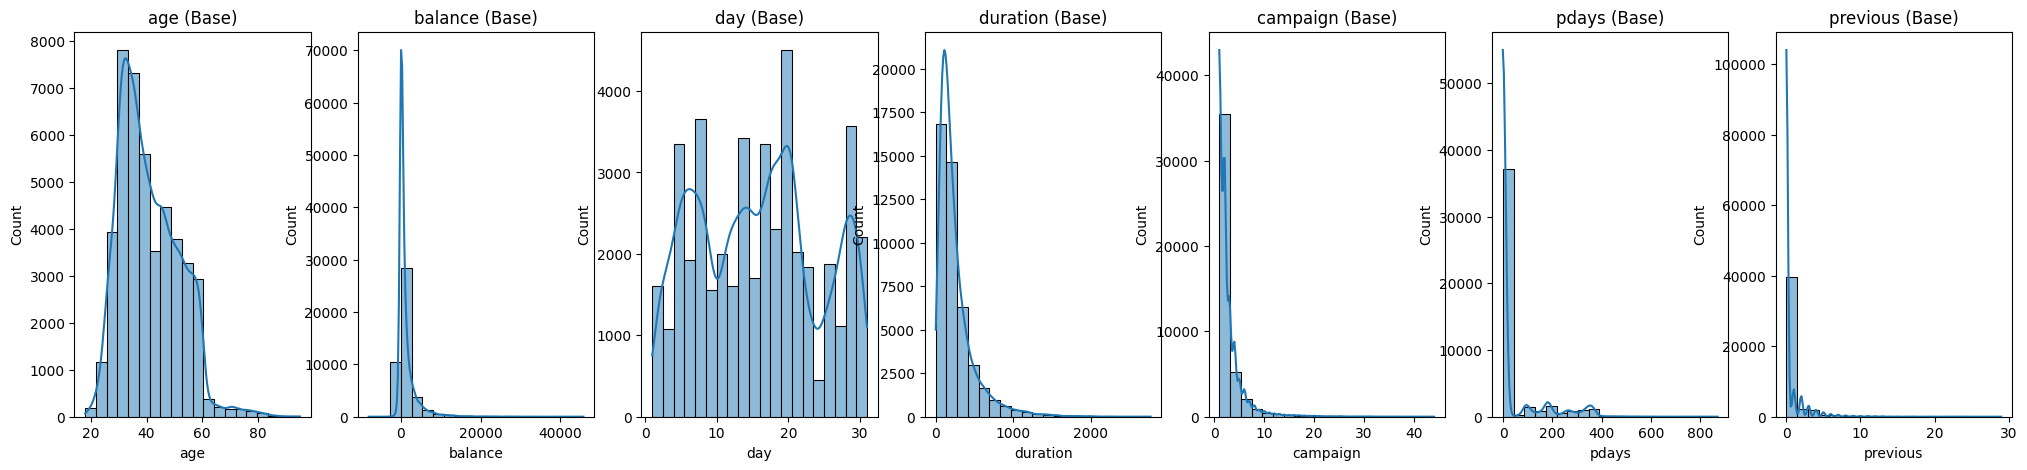

In [337]:
plt.figure(figsize=(25, 5))
for idx, col in enumerate(dfNum.columns):
    if col != 'y':
        plt.subplot(1, 7, idx+1)
        sns.histplot(df[col], kde=True,bins=20)
        plt.title(col + ' (Base)')

Since the data is right-skewed, we will try to transform the data to make it more normal distribution. We will try to transform the data using log, square root, and cube root.

#### **Age Feature**

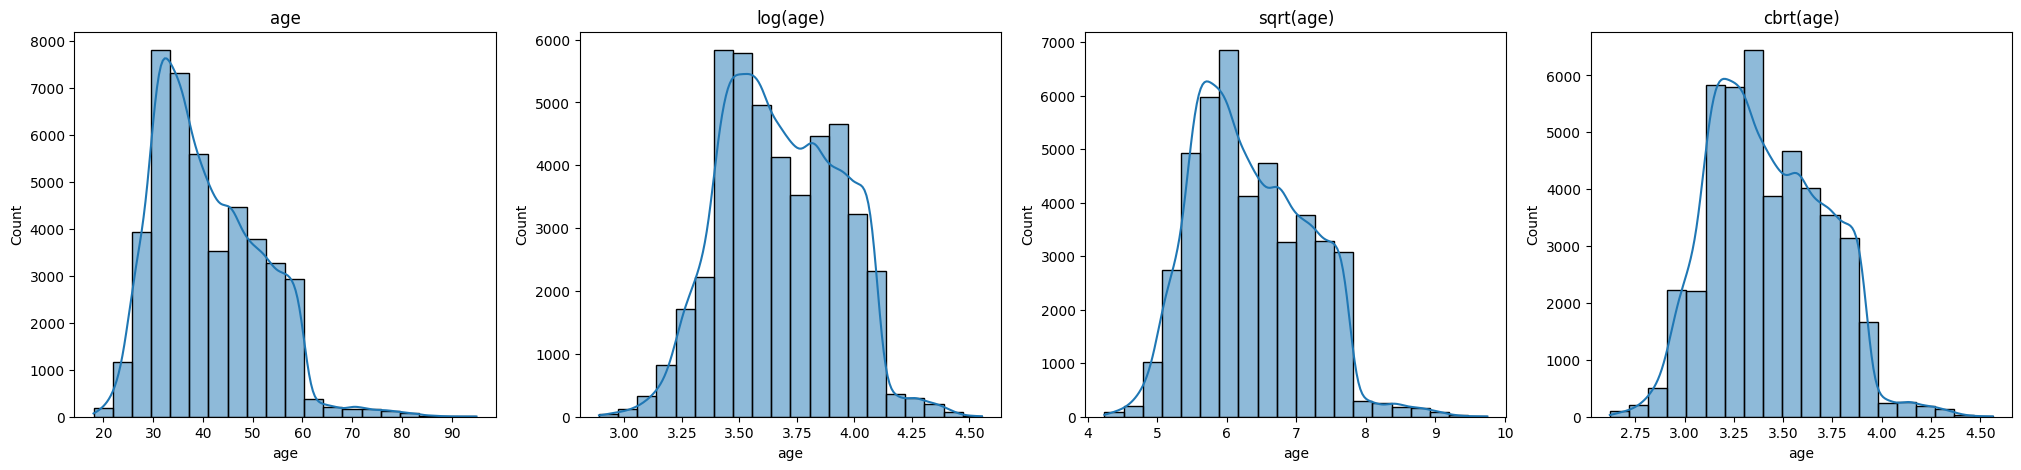

In [338]:
age_base = df['age']
age_log = np.log(df["age"])
age_sqrt = np.sqrt(df["age"])
age_cbrt = np.cbrt(df["age"])
title = ['age', 'log(age)', 'sqrt(age)', 'cbrt(age)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([age_base, age_log, age_sqrt, age_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Balance Feature**

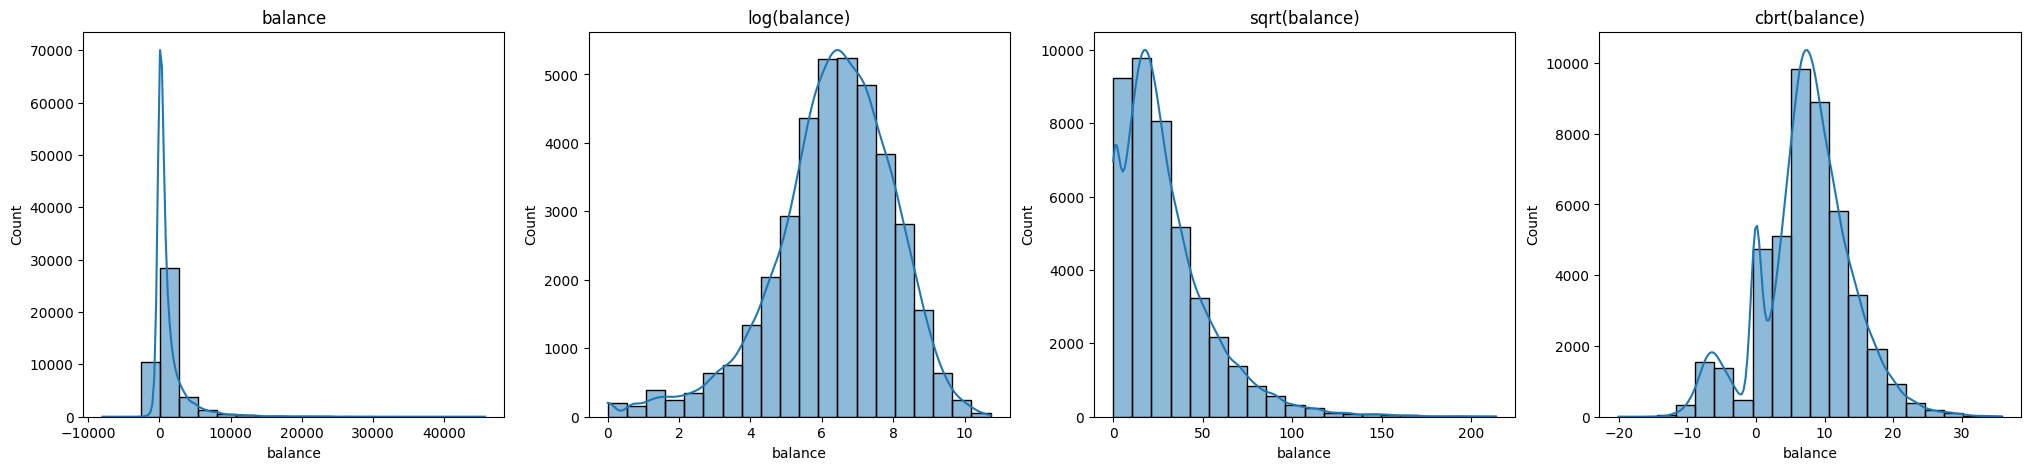

In [339]:
balance_base = df['balance']
balance_log = np.log(df["balance"])
balance_sqrt = np.sqrt(df["balance"])
balance_cbrt = np.cbrt(df["balance"])
title = ['balance', 'log(balance)', 'sqrt(balance)', 'cbrt(balance)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([balance_base, balance_log, balance_sqrt, balance_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Day Feature**

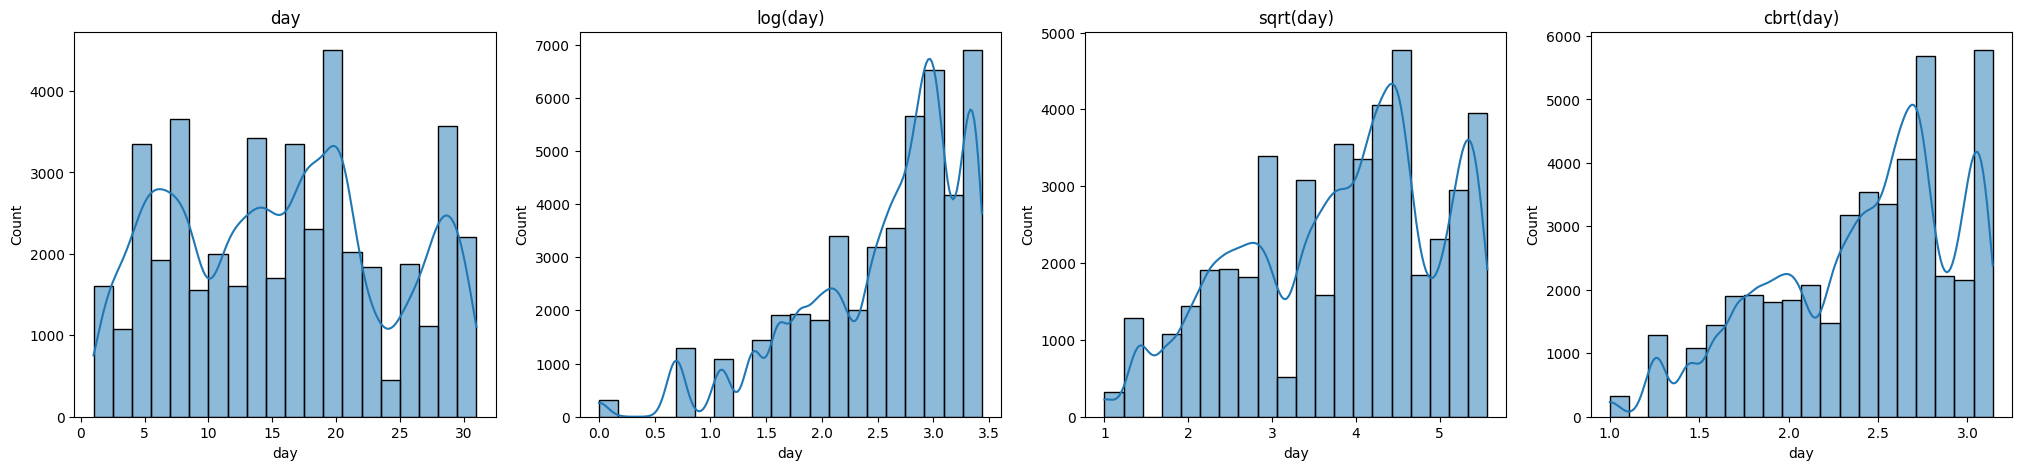

In [340]:
day_base = df['day']
day_log = np.log(df["day"])
day_sqrt = np.sqrt(df["day"])
day_cbrt = np.cbrt(df["day"])
title = ['day', 'log(day)', 'sqrt(day)', 'cbrt(day)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([day_base, day_log, day_sqrt, day_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Duration Feature**

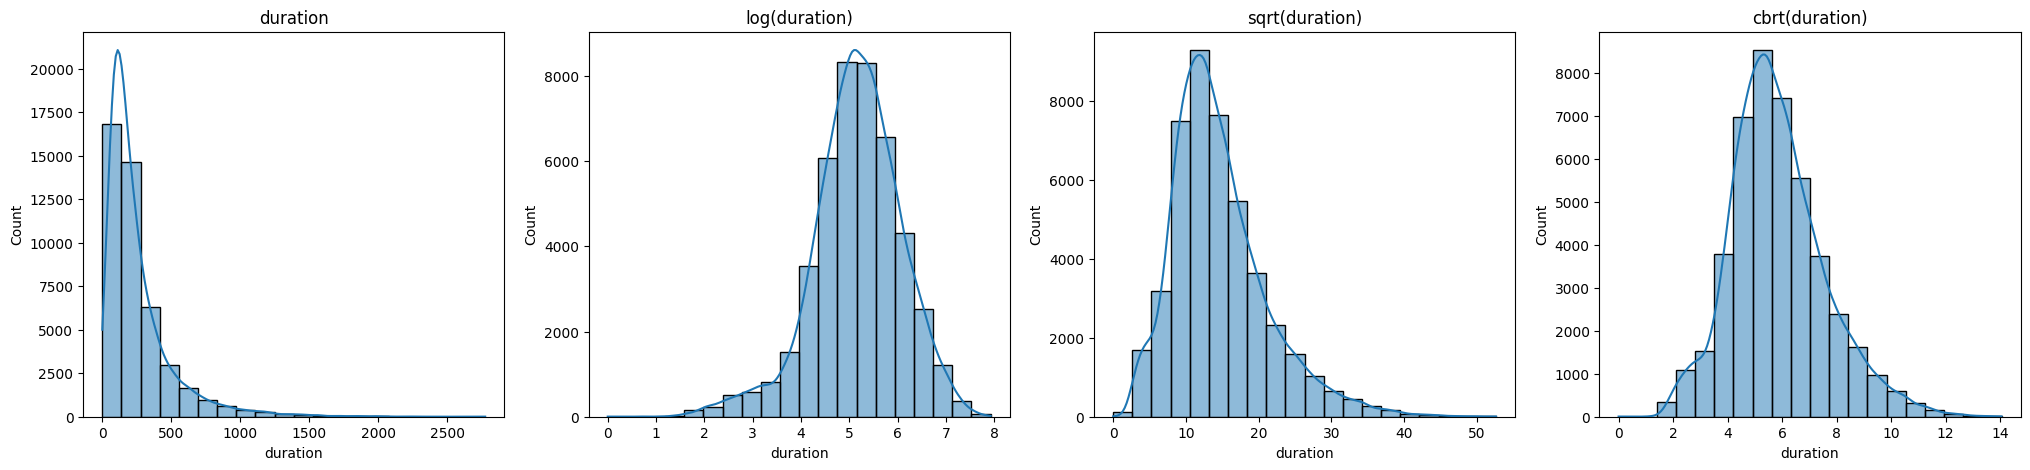

In [341]:
duration_base = df['duration']
duration_log = np.log(df["duration"])
duration_sqrt = np.sqrt(df["duration"])
duration_cbrt = np.cbrt(df["duration"])
title = ['duration', 'log(duration)', 'sqrt(duration)', 'cbrt(duration)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([duration_base, duration_log, duration_sqrt, duration_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Campaign Feature**

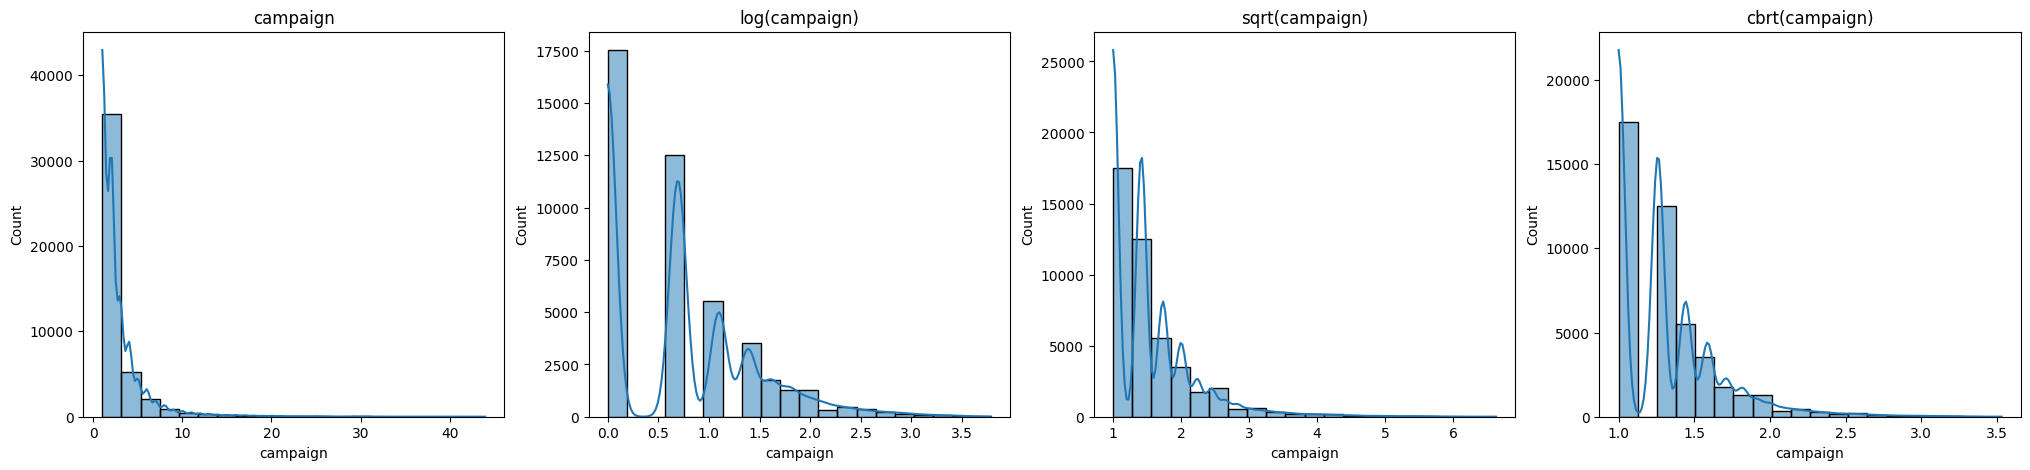

In [342]:
campaign_base = df['campaign']
campaign_log = np.log(df["campaign"])
campaign_sqrt = np.sqrt(df["campaign"])
campaign_cbrt = np.cbrt(df["campaign"])
title = ['campaign', 'log(campaign)', 'sqrt(campaign)', 'cbrt(campaign)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([campaign_base, campaign_log, campaign_sqrt, campaign_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Pdays Feature**

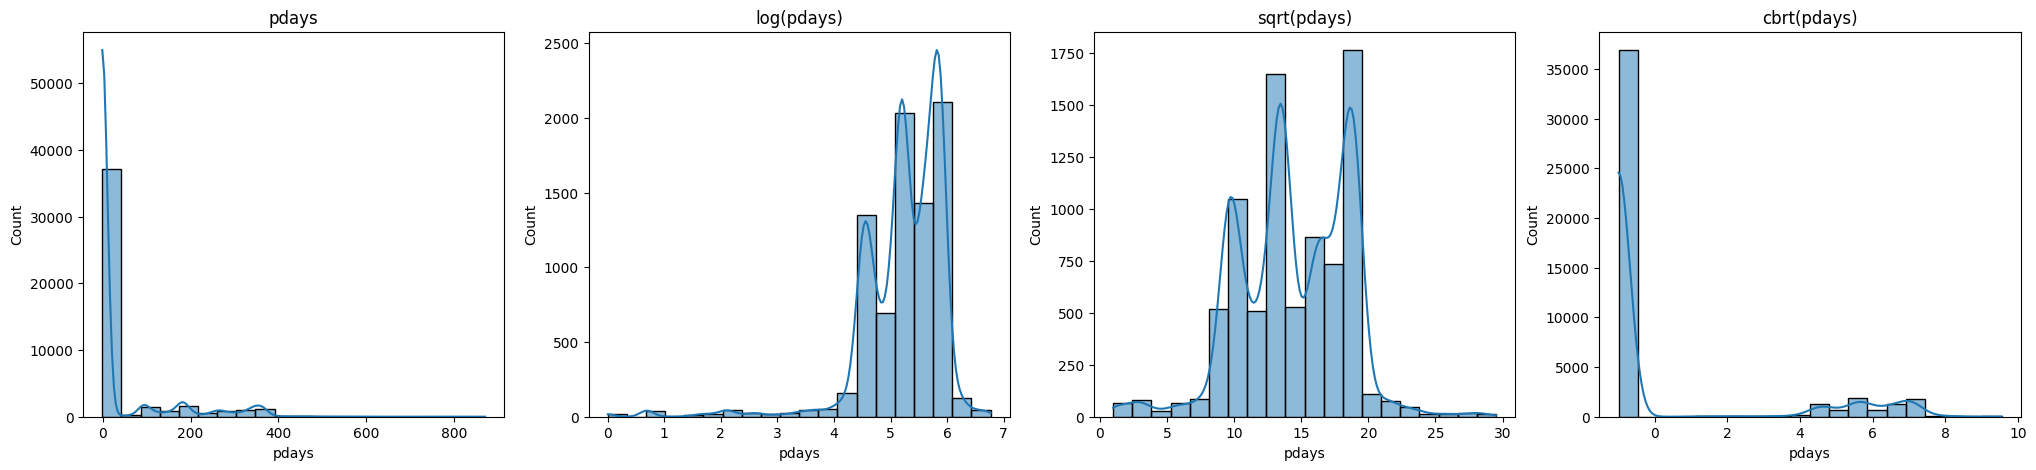

In [343]:
pdays_base = df['pdays']
pdays_log = np.log(df["pdays"])
pdays_sqrt = np.sqrt(df["pdays"])
pdays_cbrt = np.cbrt(df["pdays"])
title = ['pdays', 'log(pdays)', 'sqrt(pdays)', 'cbrt(pdays)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([pdays_base, pdays_log, pdays_sqrt, pdays_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

#### **Previous Feature**

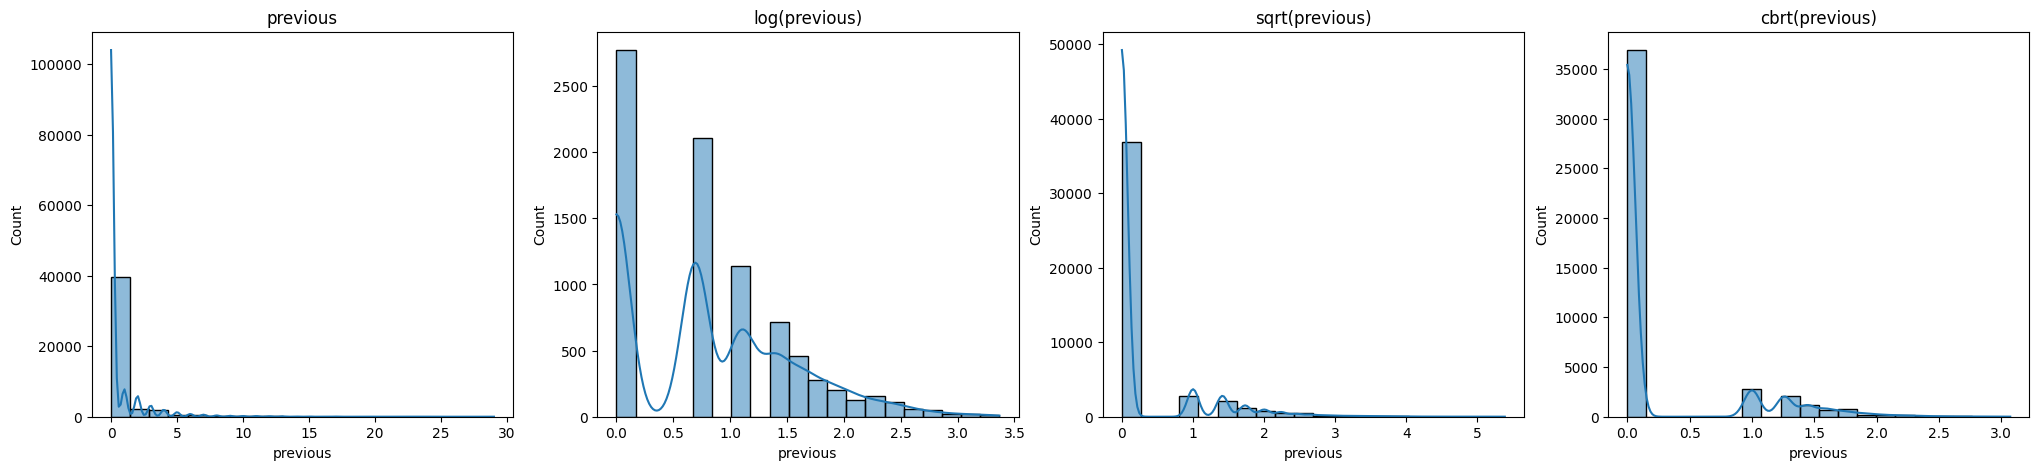

In [344]:
previous_base = df['previous']
previous_log = np.log(df["previous"])
previous_sqrt = np.sqrt(df["previous"])
previous_cbrt = np.cbrt(df["previous"])
title = ['previous', 'log(previous)', 'sqrt(previous)', 'cbrt(previous)']
plt.figure(figsize=(25, 5))
for idx, col in enumerate([previous_base, previous_log, previous_sqrt, previous_cbrt]):
    plt.subplot(1, 4, idx+1)
    sns.histplot(col, kde=True,bins=20)
    plt.title(title[idx])

from the graph above, we can see that some of the features after transformed are more normal distribution than before. However, some of the features are still right-skewed. so we will try to use the features that are more normal distribution than before. which are 
1.Age = Log
2.Balance = cbrt(followed by Log)
3.Duration = cbrt(followed by Log)

In [345]:
toEncode = [["no","yes"], ["no","yes"], ["no","yes"], ["unknown","jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]
columnToEncode = ['default', 'housing', 'loan', 'month']
columnToOnehot = ['job', 'marital', 'education', 'contact', 'poutcome']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode)),
    ("OneHotEncoder", ToDummiesTransformer())
])

In [346]:
dfDT = df.copy()
dfDT = LE_pipeline.fit_transform(dfDT)
dfDT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45142 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45142 non-null  int64
 1   balance              45142 non-null  int64
 2   day                  45142 non-null  int64
 3   duration             45142 non-null  int64
 4   campaign             45142 non-null  int64
 5   pdays                45142 non-null  int64
 6   previous             45142 non-null  int64
 7   default              45142 non-null  int64
 8   housing              45142 non-null  int64
 9   loan                 45142 non-null  int64
 10  month                45142 non-null  int64
 11  y                    45142 non-null  int64
 12  job_admin.           45142 non-null  uint8
 13  job_blue-collar      45142 non-null  uint8
 14  job_entrepreneur     45142 non-null  uint8
 15  job_housemaid        45142 non-null  uint8
 16  job_management       4

In [347]:
dfDT_X = dfDT.copy()
dfDT_X.drop('y', axis=1, inplace=True)
dfDT_Y = dfDT['y']

In [348]:
x_tf_train, x_tf_test, y_tf_train, y_tf_test = train_test_split(dfDT_X, dfDT_Y,  test_size = 0.2, random_state = 0)

#### **Model Training**

##### **Nontransformed Data**

In [349]:
DT_clf_DT_N = DecisionTreeClassifier(random_state=0)
MLP_clf_DT_N = MLPClassifier(random_state=1)
KN_clf_DT_N = KNeighborsClassifier(n_jobs=-1)

DT_clf_DT_N.fit(x_tf_train, y_tf_train)
MLP_clf_DT_N.fit(x_tf_train, y_tf_train)
KN_clf_DT_N.fit(x_tf_train, y_tf_train)
print("Decision Tree Classifier Accuracy: ", DT_clf_DT_N.score(x_tf_test, y_tf_test))
print("MLP Classifier Accuracy: ", MLP_clf_DT_N.score(x_tf_test, y_tf_test))
print("KNeighbors Classifier Accuracy: ", KN_clf_DT_N.score(x_tf_test, y_tf_test))

Decision Tree Classifier Accuracy:  0.8791671281426514
MLP Classifier Accuracy:  0.8704175434710377
KNeighbors Classifier Accuracy:  0.8801639162697973


In [350]:
yDT_pred_test1 = DT_clf_DT_N.predict(x_tf_test)
yDT_pred_test2 = MLP_clf_DT_N.predict(x_tf_test)
yDT_pred_test3 = KN_clf_DT_N.predict(x_tf_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7965
           1       0.49      0.51      0.50      1064

    accuracy                           0.88      9029
   macro avg       0.71      0.72      0.71      9029
weighted avg       0.88      0.88      0.88      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      7965
           1       0.46      0.59      0.52      1064

    accuracy                           0.87      9029
   macro avg       0.70      0.75      0.72      9029
weighted avg       0.89      0.87      0.88      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7965
           1       0.48      0.27      0.35      1064

    acc

##### **Transformed Data**

In [351]:
x_tf_train_T = x_tf_train.copy()
x_tf_test_T = x_tf_test.copy()
x_tf_train_T["age"] , x_tf_test_T["age"] = np.log(x_tf_train["age"]) , np.log(x_tf_test["age"])
x_tf_train_T["balance"] , x_tf_test_T["balance"] = np.cbrt(x_tf_train["balance"]) , np.cbrt(x_tf_test["balance"])
x_tf_train_T["duration"] , x_tf_test_T["duration"] = np.cbrt(x_tf_train["duration"]) , np.cbrt(x_tf_test["duration"])
x_tf_train_T.head()

age    balance  day  duration  campaign  pdays  previous  default  \
16664  3.806662   0.000000   24  5.155137         1     -1         0        0   
15278  3.688879  17.271310   18  4.946087         2     -1         0        0   
43829  3.258097  16.646687   28  8.719760         3    196         2        0   
19233  3.637586   5.687734    6  6.073178         2     -1         0        0   
43412  3.970292  20.801609    5  5.539658         1     -1         0        0   

       housing  loan  ...  education_secondary  education_tertiary  \
16664        1     0  ...                    0                   0   
15278        1     1  ...                    0                   1   
43829        0     0  ...                    1                   0   
19233        0     0  ...                    0                   1   
43412        0     0  ...                    0                   1   

       education_unknown  contact_cellular  contact_telephone  \
16664                  0                 1                  0   
15278                  0                 1                  0   
43829                  0                 1                  0   
19233                  0                 1                  0   
43412                  0                 1                  0   

       contact_unknown  poutcome_failure  poutcome_other  poutcome_success  \
16664                0                 0               0                 0   
15278                0                 0               0                 0   
43829                0                 0               1                 0   
19233                0                 0               0                 0   
43412                0                 0               0                 0   

       poutcome_unknown  
16664                 1  
15278                 1  
43829                 0  
19233                 1  
43412                 1  

[5 rows x 37 columns]

In [352]:
DT_clf_DT_T = DecisionTreeClassifier(random_state=0)
MLP_clf_DT_T = MLPClassifier(random_state=1)
KN_clf_DT_T = KNeighborsClassifier(n_jobs=-1)

DT_clf_DT_T.fit(x_tf_train_T, y_tf_train)
MLP_clf_DT_T.fit(x_tf_train_T, y_tf_train)
KN_clf_DT_T.fit(x_tf_train_T, y_tf_train)
print("Decision Tree Classifier Accuracy: ", DT_clf_DT_T.score(x_tf_test_T, y_tf_test))
print("MLP Classifier Accuracy: ", MLP_clf_DT_T.score(x_tf_test_T, y_tf_test))
print("KNeighbors Classifier Accuracy: ", KN_clf_DT_T.score(x_tf_test_T, y_tf_test))

Decision Tree Classifier Accuracy:  0.8794993908517
MLP Classifier Accuracy:  0.8976630856130247
KNeighbors Classifier Accuracy:  0.8929006534499945


In [353]:
yDT_pred_test1 = DT_clf_DT_T.predict(x_tf_test_T)
yDT_pred_test2 = MLP_clf_DT_T.predict(x_tf_test_T)
yDT_pred_test3 = KN_clf_DT_T.predict(x_tf_test_T)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_tf_test, y_pred=yDT_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7965
           1       0.49      0.51      0.50      1064

    accuracy                           0.88      9029
   macro avg       0.71      0.72      0.71      9029
weighted avg       0.88      0.88      0.88      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7965
           1       0.62      0.34      0.44      1064

    accuracy                           0.90      9029
   macro avg       0.77      0.66      0.69      9029
weighted avg       0.88      0.90      0.88      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7965
           1       0.58      0.32      0.41      1064

    acc

#### **Conclusion**

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.88|Decision Tree|Not Tranformed|
1|0.49|0.51|0.50|^|Decision Tree|Not Tranformed|
0|0.94|0.91|0.93|0.87|MLP|Not Tranformed|
1|0.46|0.59|0.52|^|MLP|Not Tranformed|
0|0.91|0.96|0.93|0.88|K-Nearest|Not Tranformed|
1|0.48|0.27|0.35|^|K-Nearest|Not Tranformed|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.88|Decision Tree|Tranformed|
1|0.49|0.51|0.50|^|Decision Tree|Tranformed|
0|0.82|0.97|0.94|0.90|MLP|Tranformed|
1|0.62|0.34|0.44|^|MLP|Tranformed|
0|0.91|0.97|0.94|0.89|K-Nearest|Tranformed|
1|0.58|0.32|0.41|^|K-Nearest|Tranformed|

จากการทำ Data Transform กับ Data set ของเรา จะทำให้ข้อมูลเรามีการกรัจายตัวที่เปลี่ยนไปในบาง Feature จึงทำให้เราต้องทำการ Train Model ใหม่ ดังนั้นเราจึงทำการ Train Model ใหม่ด้วย 3 Model ที่เราเลือกไว้ก่อนหน้านี้ คือ Decision Tree, MLP, K-Nearest โดยใช้ข้อมูลที่เราทำการ Transform แล้ว แต่ผลปรากฏว่า การทำ Data Transform กับ Data set ของเรา จะทำให้ประสิทธิภาพของ Model ของเราเปลี่ยนแปลงไปแบ่งออกเป็น 3 รูปแบบกับทั้ง 3 Model ดังนี้
1. Decision Tree มีประสิทธิภาพที่คล้ายกันกับ Model ที่เรา Train กับข้อมูลที่ไม่ได้ทำ Data Transform
2. K-Nearest มีประสิทธิภาพที่ดีขึ้นเมื่อเทียบกับ Model ที่เรา Train กับข้อมูลที่ไม่ได้ทำ Data Transform
3. MLP มีประสิทธิภาพที่ลดลงเมื่อเทียบกับ Model ที่เรา Train กับข้อมูลที่ไม่ได้ทำ Data Transform 

ดั้งนั้นเราจึงเลือก Model ที่จะใช้ข้อมูลที่เราทำการ Transform แล้ว ในการทำนายผลลัพธ์ คือ K-Nearest เท่านั้น

### **Experiment 4 : Data Scaling**

In [354]:
dfDS = df.copy()

#### **Feature Encoding**

In [355]:
toEncode = [["no","yes"], ["no","yes"], ["no","yes"], ["unknown","jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]
columnToEncode = ['default', 'housing', 'loan', 'month']
columnToOnehot = ['job', 'marital', 'education', 'contact', 'poutcome']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode)),
    ("OneHotEncoder", ToDummiesTransformer())
])

In [356]:
dfDS = LE_pipeline.fit_transform(dfDS)

In [357]:
X, y = dfDS.drop(['y'], axis = 1), dfDS['y']

#### **Feature Scaling**

In [358]:
MinMaxScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

StandardScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

RobustScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

In [359]:
dfMMS = pd.concat([X, y], axis=1)
dfSS = pd.concat([X, y], axis=1)
dfRS = pd.concat([X, y], axis=1)

for idx in dfEX2.columns:
    if idx not in ['y']:
        dfMMS[idx] = MinMaxScale.fit_transform(X[idx].values.reshape(-1,1))
        dfSS[idx] = StandardScale.fit_transform(X[idx].values.reshape(-1,1))
        dfRS[idx] = RobustScale.fit_transform(X[idx].values.reshape(-1,1))

In [360]:
XMMS, yMMS = dfMMS.drop(['y'], axis = 1), dfMMS['y']
XSS, ySS = dfSS.drop(['y'], axis = 1), dfSS['y']
XRS, yRS = dfRS.drop(['y'], axis = 1), dfRS['y']

xMMS_train, xMMS_test, yMMS_train, yMMS_test = train_test_split(XMMS, yMMS, test_size=0.2, random_state=1)
xSS_train, xSS_test, ySS_train, ySS_test = train_test_split(XSS, ySS, test_size=0.2, random_state=1)
xRS_train, xRS_test, yRS_train, yRS_test = train_test_split(XRS, yRS, test_size=0.2, random_state=1)

##### **Decision Tree Classification**

In [361]:
DT_MMS = DecisionTreeClassifier(random_state=1)
DT_MMS = DT_MMS.fit(xMMS_train,yMMS_train)
print('Train score: ', DT_MMS.score(xMMS_train, yMMS_train))
print('Test score: ', DT_MMS.score(xMMS_test, yMMS_test))

Train score:  1.0
Test score:  0.8717465943072322


In [362]:
yDTMMS_pred_test = DT_MMS.predict(xMMS_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yMMS_test, y_pred=yDTMMS_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yMMS_test, y_pred=yDTMMS_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7931
           1       0.47      0.47      0.47      1098

    accuracy                           0.87      9029
   macro avg       0.70      0.70      0.70      9029
weighted avg       0.87      0.87      0.87      9029

Confusion matrix on Test data
[[7352  579]
 [ 579  519]]


In [363]:
DT_SS = DecisionTreeClassifier(random_state=1)
DT_SS = DT_SS.fit(xSS_train,ySS_train)
print('Train score: ', DT_SS.score(xSS_train, ySS_train))
print('Test score: ', DT_SS.score(xSS_test, ySS_test))

Train score:  1.0
Test score:  0.8717465943072322


In [364]:
yDTSS_pred_test = DT_SS.predict(xSS_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=ySS_test, y_pred=yDTSS_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=ySS_test, y_pred=yDTSS_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7931
           1       0.47      0.47      0.47      1098

    accuracy                           0.87      9029
   macro avg       0.70      0.70      0.70      9029
weighted avg       0.87      0.87      0.87      9029

Confusion matrix on Test data
[[7352  579]
 [ 579  519]]


In [365]:
DT_RS = DecisionTreeClassifier(random_state=1)
DT_RS = DT_RS.fit(xRS_train,yRS_train)
print('Train score: ', DT_RS.score(xRS_train, yRS_train))
print('Test score: ', DT_RS.score(xRS_test, yRS_test))

Train score:  1.0
Test score:  0.8715250858345331


In [366]:
yDTRS_pred_test = DT_RS.predict(xRS_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yRS_test, y_pred=yDTRS_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yRS_test, y_pred=yDTRS_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7931
           1       0.47      0.47      0.47      1098

    accuracy                           0.87      9029
   macro avg       0.70      0.70      0.70      9029
weighted avg       0.87      0.87      0.87      9029

Confusion matrix on Test data
[[7348  583]
 [ 577  521]]


##### **Multi-Layer Perceptron Classifier**

In [367]:
MLP_MMS = MLPClassifier(random_state=1)
MLP_MMS = MLP_MMS.fit(xMMS_train,yMMS_train)
print('Train score: ', MLP_MMS.score(xMMS_train, yMMS_train))
print('Test score: ', MLP_MMS.score(xMMS_test, yMMS_test))

Train score:  0.9232409381663113
Test score:  0.893011407686344


In [368]:
yMLPMMS_pred_test = MLP_MMS.predict(xMMS_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yMMS_test, y_pred=yMLPMMS_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yMMS_test, y_pred=yMLPMMS_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7931
           1       0.59      0.40      0.47      1098

    accuracy                           0.89      9029
   macro avg       0.75      0.68      0.71      9029
weighted avg       0.88      0.89      0.88      9029

Confusion matrix on Test data
[[7627  304]
 [ 662  436]]


In [369]:
MLP_SS = MLPClassifier(random_state=1)
MLP_SS = MLP_SS.fit(xSS_train,ySS_train)
print('Train score: ', MLP_SS.score(xSS_train, ySS_train))
print('Test score: ', MLP_SS.score(xSS_test, ySS_test))

Train score:  0.9373355855232188
Test score:  0.887695204341566


In [370]:
yMLPSS_pred_test = MLP_SS.predict(xSS_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=ySS_test, y_pred=yMLPSS_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=ySS_test, y_pred=yMLPSS_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7931
           1       0.55      0.42      0.48      1098

    accuracy                           0.89      9029
   macro avg       0.74      0.69      0.71      9029
weighted avg       0.88      0.89      0.88      9029

Confusion matrix on Test data
[[7555  376]
 [ 638  460]]


In [371]:
MLP_RS = MLPClassifier(random_state=1)
MLP_RS = MLP_RS.fit(xRS_train,yRS_train)
print('Train score: ', MLP_RS.score(xRS_train, yRS_train))
print('Test score: ', MLP_RS.score(xRS_test, yRS_test))

Train score:  0.9222440672334062
Test score:  0.897109314431277


In [372]:
yMLPRS_pred_test = MLP_RS.predict(xRS_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yRS_test, y_pred=yMLPRS_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yRS_test, y_pred=yMLPRS_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7931
           1       0.62      0.39      0.48      1098

    accuracy                           0.90      9029
   macro avg       0.77      0.68      0.71      9029
weighted avg       0.88      0.90      0.89      9029

Confusion matrix on Test data
[[7675  256]
 [ 673  425]]


##### **K-Nearest Neighbors**

In [373]:
KNN_MMS = KNeighborsClassifier(n_jobs=-1)
KNN_MMS = KNN_MMS.fit(xMMS_train,yMMS_train)
print('Train score: ', KNN_MMS.score(xMMS_train, yMMS_train))
print('Test score: ', KNN_MMS.score(xMMS_test, yMMS_test))

Train score:  0.9151828981253288
Test score:  0.8849263484328276


In [374]:
yKNNMMS_pred_test = KNN_MMS.predict(xMMS_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yMMS_test, y_pred=yKNNMMS_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yMMS_test, y_pred=yKNNMMS_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7931
           1       0.56      0.25      0.35      1098

    accuracy                           0.88      9029
   macro avg       0.73      0.61      0.64      9029
weighted avg       0.86      0.88      0.87      9029

Confusion matrix on Test data
[[7713  218]
 [ 821  277]]


In [375]:
KNN_SS = KNeighborsClassifier(n_jobs=-1)
KNN_SS = KNN_SS.fit(xSS_train,ySS_train)
print('Train score: ', KNN_SS.score(xSS_train, ySS_train))
print('Test score: ', KNN_SS.score(xSS_test, ySS_test))

Train score:  0.9184227286572703
Test score:  0.8883597297596633


In [376]:
yKNNSS_pred_test = KNN_SS.predict(xSS_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=ySS_test, y_pred=yKNNSS_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=ySS_test, y_pred=yKNNSS_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7931
           1       0.58      0.30      0.40      1098

    accuracy                           0.89      9029
   macro avg       0.74      0.64      0.67      9029
weighted avg       0.87      0.89      0.87      9029

Confusion matrix on Test data
[[7687  244]
 [ 764  334]]


In [377]:
KNN_RS = KNeighborsClassifier(n_jobs=-1)
KNN_RS = KNN_RS.fit(xRS_train,yRS_train)
print('Train score: ', KNN_RS.score(xRS_train, yRS_train))
print('Test score: ', KNN_RS.score(xRS_test, yRS_test))

Train score:  0.920776451693296
Test score:  0.8901317975412559


In [378]:
yKNNRS_pred_test = KNN_RS.predict(xRS_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yRS_test, y_pred=yKNNRS_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yRS_test, y_pred=yKNNRS_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7931
           1       0.59      0.33      0.42      1098

    accuracy                           0.89      9029
   macro avg       0.75      0.65      0.68      9029
weighted avg       0.87      0.89      0.88      9029

Confusion matrix on Test data
[[7674  257]
 [ 735  363]]


### **Experiment 5 : Drop Feature**

#### **Hypothesis**
    
We will drop some features that we think are not important to the model or have a low correlation with the target.

In [487]:
def checkCorrFF(df):
    plt.figure(figsize=(20,10))
    cor = df.corr()
    # mask = np.zeros_like(cor, dtype=np.bool)
    # mask[np.triu_indices_from(mask)] = True
    sns.heatmap(cor, annot=True, cmap='inferno')
    plt.show()

In [488]:
toEncode = [["no","yes"], ["no","yes"], ["no","yes"], ["unknown","jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]]
columnToEncode = ['default', 'housing', 'loan', 'month']
columnToOnehot = ['job', 'marital', 'education', 'contact', 'poutcome']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode)),
    ("OneHotEncoder", ToDummiesTransformer())
])

In [489]:
dfDF = df.copy()
dfDF = LE_pipeline.fit_transform(dfDF)
x = dfDF.drop('y', axis=1)
y = dfDF['y']
dfDF = pd.concat([x,y], axis=1)
dfDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45142 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45142 non-null  int64
 1   balance              45142 non-null  int64
 2   day                  45142 non-null  int64
 3   duration             45142 non-null  int64
 4   campaign             45142 non-null  int64
 5   pdays                45142 non-null  int64
 6   previous             45142 non-null  int64
 7   default              45142 non-null  int64
 8   housing              45142 non-null  int64
 9   loan                 45142 non-null  int64
 10  month                45142 non-null  int64
 11  job_admin.           45142 non-null  uint8
 12  job_blue-collar      45142 non-null  uint8
 13  job_entrepreneur     45142 non-null  uint8
 14  job_housemaid        45142 non-null  uint8
 15  job_management       45142 non-null  uint8
 16  job_retired          4

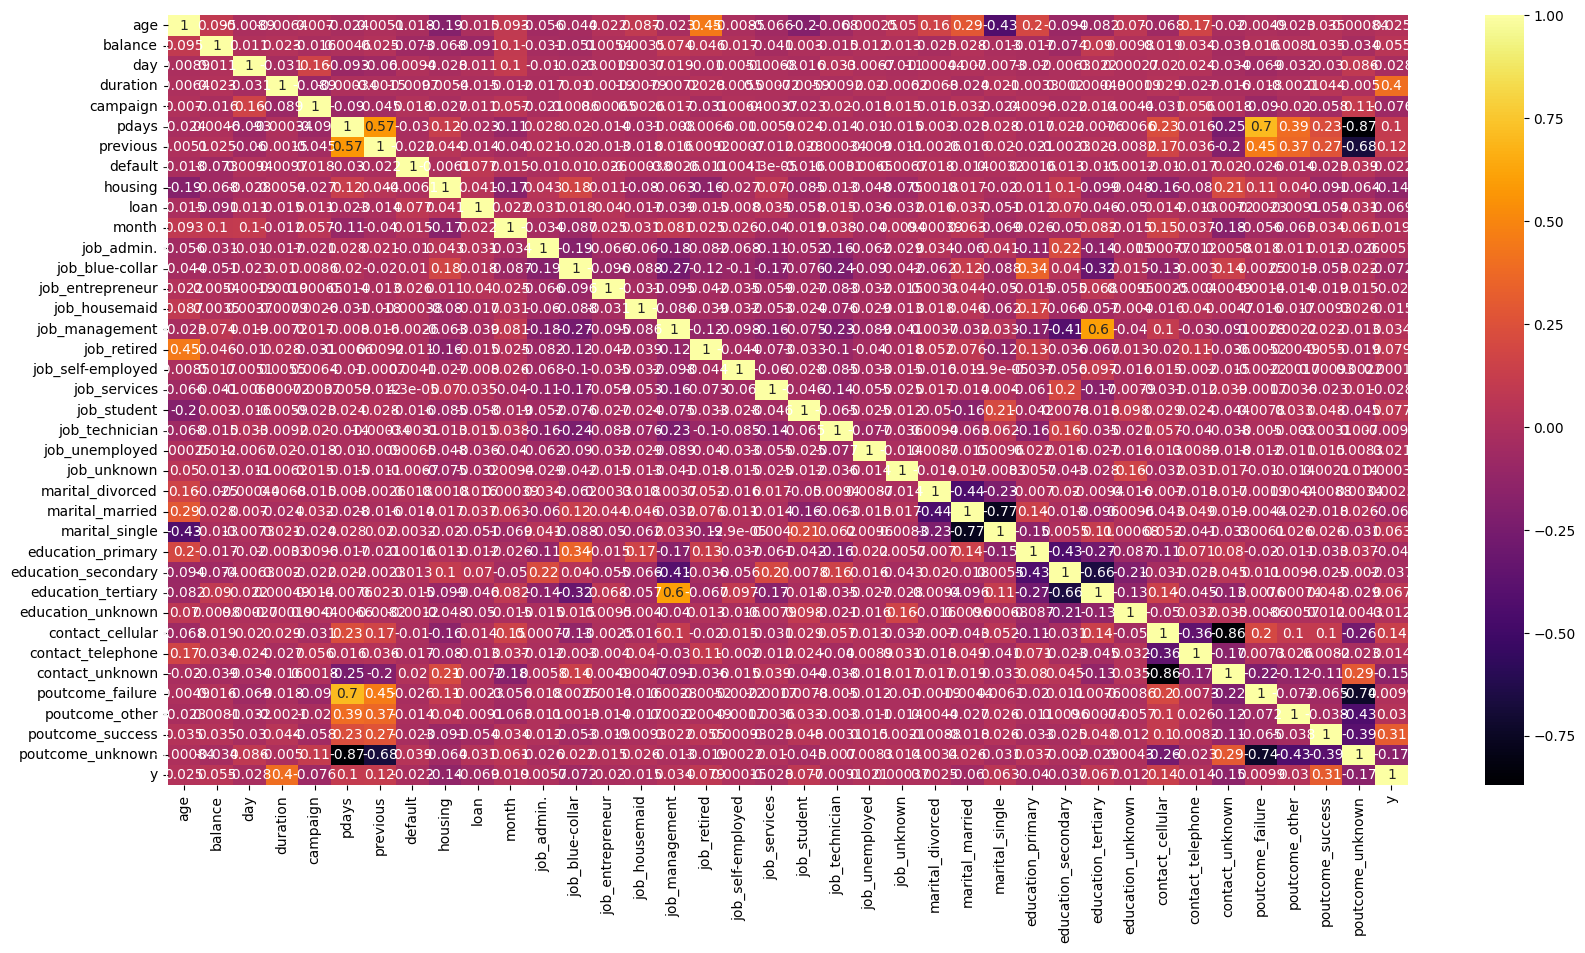

In [490]:
checkCorrFF(dfDF)

Since we have very many features, we will drop the features fist, with ANOVA method(beacause we have both categorical and numerical features).

#### **ANOVA method**

In [491]:
selector = SelectKBest(f_classif, k=12)
x_sa = dfDF.drop(['y'], axis = 1)
y_sa = dfDF['y']

dfDF = selector.fit(x_sa, y_sa)

col = selector.get_support(indices=True)
dfDF = x_sa.iloc[:,col]
dfDF = pd.concat([dfDF, y_sa], axis=1)

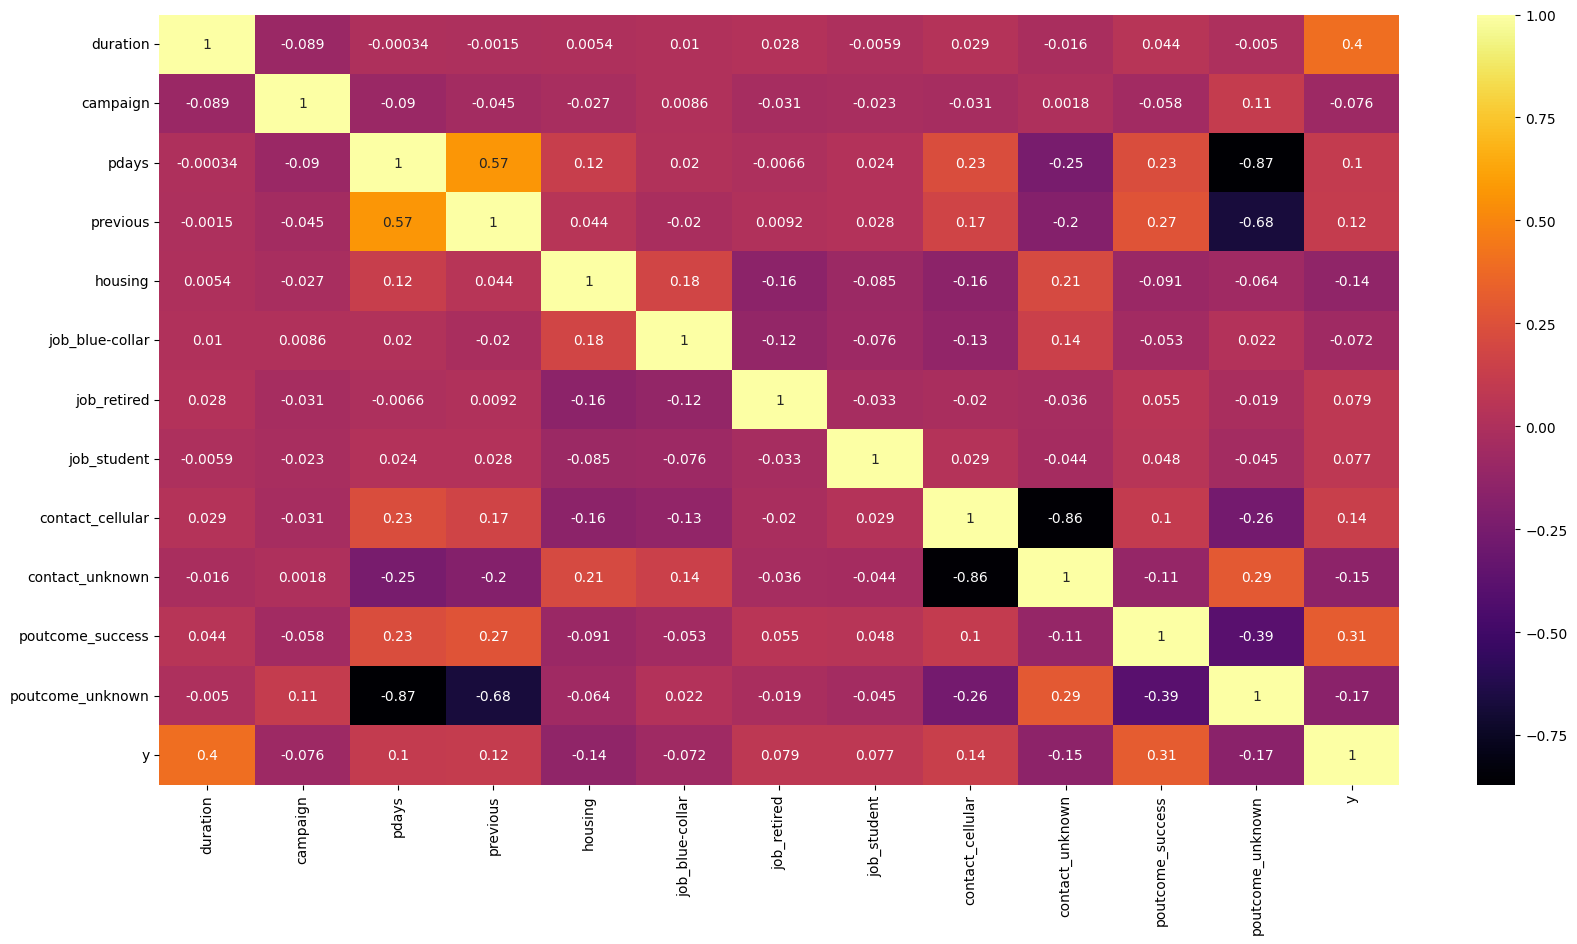

In [492]:
checkCorrFF(dfDF)

From the correlation matrix, we can see that there are some features that have a low correlation with the target. We will drop these features.

In [493]:
dfDF.columns

Index(['duration', 'campaign', 'pdays', 'previous', 'housing',
       'job_blue-collar', 'job_retired', 'job_student', 'contact_cellular',
       'contact_unknown', 'poutcome_success', 'poutcome_unknown', 'y'],
      dtype='object')

In [494]:
x_fd_train , x_fd_test , y_fd_train , y_fd_test = train_test_split(dfDF.drop(['y'], axis = 1), dfDF['y'], test_size=0.2, random_state=0)
dfDF = pd.concat([x_fd_train, y_fd_train], axis=1)
dfDF_Test = pd.concat([x_fd_test, y_fd_test], axis=1)

Then we will consider dropping some features that have a low correlation with the target anmd have a high correlation with other features.

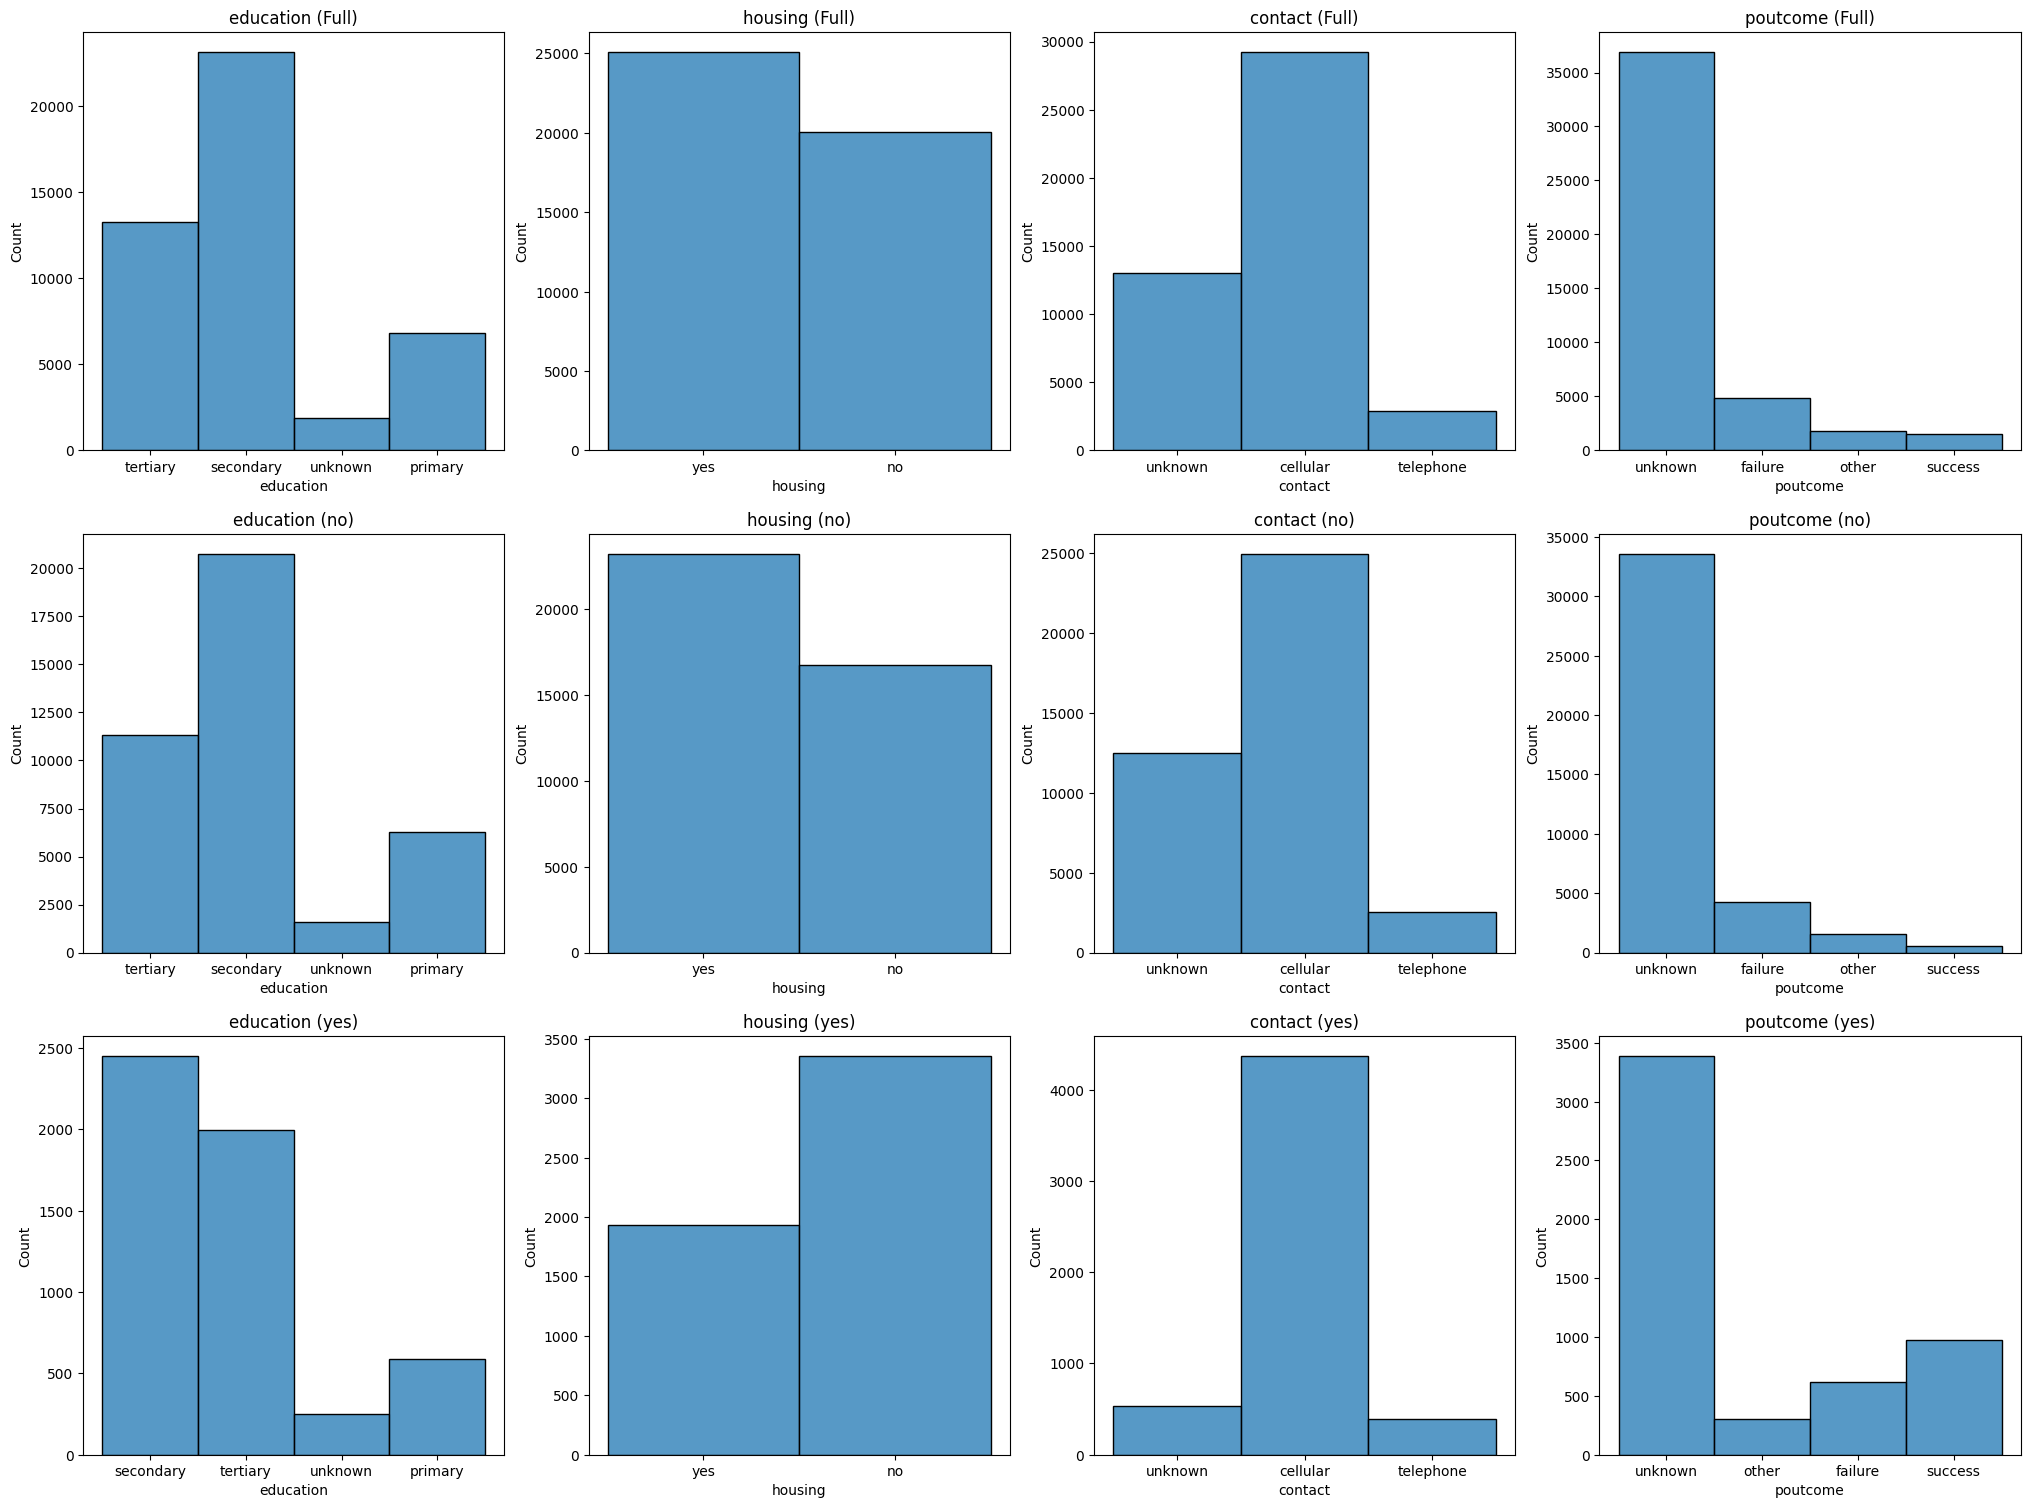

In [495]:
colToPlot = ['education', 'housing', 'contact', 'poutcome']
plt.figure(figsize=(25,25))
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1)
    sns.histplot(df[col], kde=False)
    plt.title(col + ' (Full)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+len(colToPlot)+1)
    sns.histplot(dfno[col], kde=False)
    plt.title(col + ' (no)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1+(len(colToPlot)*2))
    sns.histplot(dfyes[col], kde=False)
    plt.title(col + ' (yes)')

from this figure, we can see that there are "contact" and "poutcome" have different histograms. In "contact", there are 2 types of categories, "cellular" and "unknown" in which "unknown" is the difference category that may determine the target class because it is in "no" category of target class more than the others and the same reason for "poutcome" "success "feature. 

So we will drop the "poutcome_unknown" and "contact_cellular" features.

In [496]:
colToDropLowCor = ['job_blue-collar','job_student','job_retired','campaign']
colToDropHighCor = ['poutcome_unknown','contact_cellular']
colToDropLowHighCor = ['job_blue-collar','job_student','job_retired','campaign','poutcome_unknown','contact_unknown']
dfDF_D_L = dfDF.copy()
dfDF_D_H = dfDF.copy()
dfDF_D_LH = dfDF.copy()
dfDF_D_L = dfDF_D_L.drop(colToDropLowCor, axis = 1)
dfDF_D_H = dfDF_D_H.drop(colToDropHighCor, axis = 1)
dfDF_D_LH = dfDF_D_LH.drop(colToDropLowHighCor, axis = 1)

dfDF_Test_D_L = dfDF_Test.copy()
dfDF_Test_D_H = dfDF_Test.copy()
dfDF_Test_D_LH = dfDF_Test.copy()
dfDF_Test_D_L = dfDF_Test_D_L.drop(colToDropLowCor, axis = 1)
dfDF_Test_D_H = dfDF_Test_D_H.drop(colToDropHighCor, axis = 1)
dfDF_Test_D_LH = dfDF_Test_D_LH.drop(colToDropLowHighCor, axis = 1)

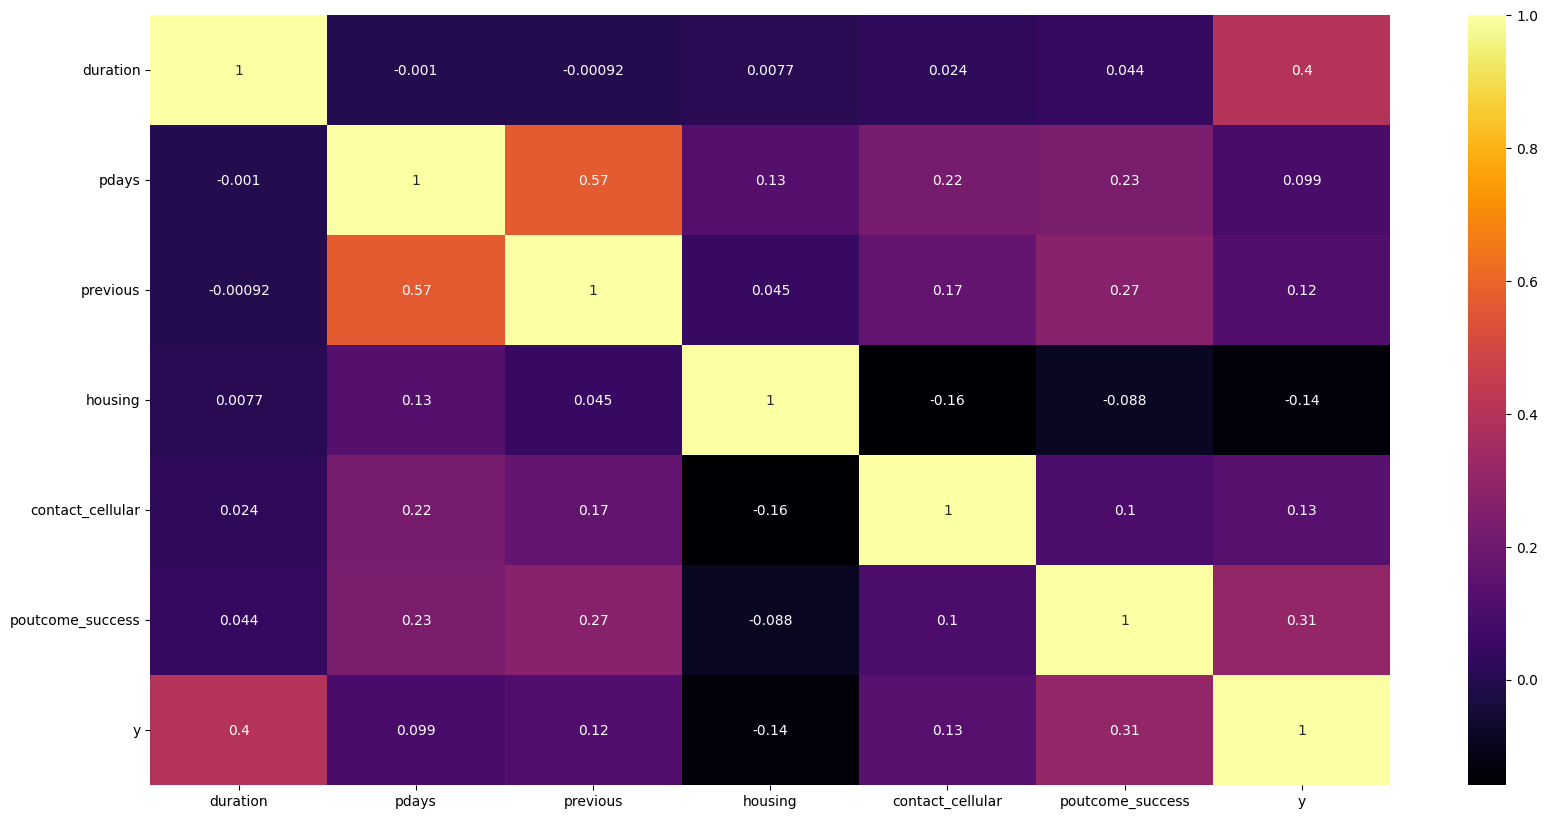

In [497]:
checkCorrFF(dfDF_D_LH)

In [498]:
x_fd_train , y_fd_train, x_fd_test , y_fd_test = dfDF.drop(['y'], axis = 1) , dfDF['y'] , dfDF_Test.drop(['y'], axis = 1) , dfDF_Test['y']
x_fd_train_L , y_fd_train_L, x_fd_test_L , y_fd_test_L = dfDF_D_L.drop(['y'], axis = 1) , dfDF_D_L['y'] , dfDF_Test_D_L.drop(['y'], axis = 1) , dfDF_Test_D_L['y']
x_fd_train_H , y_fd_train_H, x_fd_test_H , y_fd_test_H = dfDF_D_H.drop(['y'], axis = 1) , dfDF_D_H['y'] , dfDF_Test_D_H.drop(['y'], axis = 1) , dfDF_Test_D_H['y']
x_fd_train_LH , y_fd_train_LH, x_fd_test_LH , y_fd_test_LH = dfDF_D_LH.drop(['y'], axis = 1) , dfDF_D_LH['y'] , dfDF_Test_D_LH.drop(['y'], axis = 1) , dfDF_Test_D_LH['y']

In [499]:
x_fd_train.head()

duration  campaign  pdays  previous  housing  job_blue-collar  \
16664       137         1     -1         0        1                1   
15278       121         2     -1         0        1                0   
43829       663         3    196         2        0                0   
19233       224         2     -1         0        0                0   
43412       170         1     -1         0        0                0   

       job_retired  job_student  contact_cellular  contact_unknown  \
16664            0            0                 1                0   
15278            0            0                 1                0   
43829            0            1                 1                0   
19233            0            0                 1                0   
43412            0            0                 1                0   

       poutcome_success  poutcome_unknown  
16664                 0                 1  
15278                 0                 1  
43829                 0                 0  
19233                 0                 1  
43412                 0                 1

In [500]:
x_fd_train_LH.head()

duration  pdays  previous  housing  contact_cellular  poutcome_success
16664       137     -1         0        1                 1                 0
15278       121     -1         0        1                 1                 0
43829       663    196         2        0                 1                 0
19233       224     -1         0        0                 1                 0
43412       170     -1         0        0                 1                 0

#### **Model Training**

##### **ANOVA**

In [501]:
DT_clf_DF_N = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_N = MLPClassifier(random_state=1)
KN_clf_DF_N = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_N.fit(x_fd_train, y_fd_train)
MLP_clf_DF_N.fit(x_fd_train, y_fd_train)
KN_clf_DF_N.fit(x_fd_train, y_fd_train)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_N.score(x_fd_test, y_fd_test))
print("MLP Classifier Accuracy: ", MLP_clf_DF_N.score(x_fd_test, y_fd_test))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_N.score(x_fd_test, y_fd_test))

Decision Tree Classifier Accuracy:  0.8693100011075424
MLP Classifier Accuracy:  0.8965555432495292
KNeighbors Classifier Accuracy:  0.8830435264148854


In [502]:
yFD_pred_test1 = DT_clf_DF_N.predict(x_fd_test)
yFD_pred_test2 = MLP_clf_DF_N.predict(x_fd_test)
yFD_pred_test3 = KN_clf_DF_N.predict(x_fd_test)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test, y_pred=yFD_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7965
           1       0.43      0.36      0.40      1064

    accuracy                           0.87      9029
   macro avg       0.68      0.65      0.66      9029
weighted avg       0.86      0.87      0.86      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7965
           1       0.71      0.20      0.32      1064

    accuracy                           0.90      9029
   macro avg       0.81      0.60      0.63      9029
weighted avg       0.88      0.90      0.87      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7965
           1       0.51      0.33      0.40      1064

    acc

##### **Drop Low Correltation with Output**

In [503]:
DT_clf_DF_L = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_L = MLPClassifier(random_state=1)
KN_clf_DF_L = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_L.fit(x_fd_train_L, y_fd_train_L)
MLP_clf_DF_L.fit(x_fd_train_L, y_fd_train_L)
KN_clf_DF_L.fit(x_fd_train_L, y_fd_train_L)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_L.score(x_fd_test_L, y_fd_test_L))
print("MLP Classifier Accuracy: ", MLP_clf_DF_L.score(x_fd_test_L, y_fd_test_L))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_L.score(x_fd_test_L, y_fd_test_L))

Decision Tree Classifier Accuracy:  0.882157492524089
MLP Classifier Accuracy:  0.8947834754679367
KNeighbors Classifier Accuracy:  0.8843725772510799


In [504]:
yFD_pred_test1 = DT_clf_DF_L.predict(x_fd_test_L)
yFD_pred_test2 = MLP_clf_DF_L.predict(x_fd_test_L)
yFD_pred_test3 = KN_clf_DF_L.predict(x_fd_test_L)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test_L, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test_L, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test_L, y_pred=yFD_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7965
           1       0.50      0.32      0.39      1064

    accuracy                           0.88      9029
   macro avg       0.71      0.64      0.66      9029
weighted avg       0.86      0.88      0.87      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7965
           1       0.71      0.18      0.29      1064

    accuracy                           0.89      9029
   macro avg       0.81      0.58      0.61      9029
weighted avg       0.88      0.89      0.87      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7965
           1       0.51      0.34      0.41      1064

    acc

##### **Drop High Correltation with other Feature**

In [505]:
DT_clf_DF_H = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_H = MLPClassifier(random_state=1)
KN_clf_DF_H = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_H.fit(x_fd_train_H, y_fd_train_H)
MLP_clf_DF_H.fit(x_fd_train_H, y_fd_train_H)
KN_clf_DF_H.fit(x_fd_train_H, y_fd_train_H)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_H.score(x_fd_test_H, y_fd_test_H))
print("MLP Classifier Accuracy: ", MLP_clf_DF_H.score(x_fd_test_H, y_fd_test_H))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_H.score(x_fd_test_H, y_fd_test_H))

Decision Tree Classifier Accuracy:  0.8703067892346882
MLP Classifier Accuracy:  0.898549119503821
KNeighbors Classifier Accuracy:  0.8830435264148854


In [506]:
yFD_pred_test1 = DT_clf_DF_H.predict(x_fd_test_H)
yFD_pred_test2 = MLP_clf_DF_H.predict(x_fd_test_H)
yFD_pred_test3 = KN_clf_DF_H.predict(x_fd_test_H)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test_H, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test_H, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test_H, y_pred=yFD_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7965
           1       0.44      0.36      0.40      1064

    accuracy                           0.87      9029
   macro avg       0.68      0.65      0.66      9029
weighted avg       0.86      0.87      0.86      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7965
           1       0.67      0.28      0.39      1064

    accuracy                           0.90      9029
   macro avg       0.79      0.63      0.67      9029
weighted avg       0.88      0.90      0.88      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7965
           1       0.51      0.33      0.40      1064

    acc

##### **Drop Low Correltation with Output and High Correltation with other Feature**

In [507]:
DT_clf_DF_LH = DecisionTreeClassifier(random_state=0)
MLP_clf_DF_LH = MLPClassifier(random_state=1)
KN_clf_DF_LH = KNeighborsClassifier(n_jobs=-1)

DT_clf_DF_LH.fit(x_fd_train_LH, y_fd_train_LH)
MLP_clf_DF_LH.fit(x_fd_train_LH, y_fd_train_LH)
KN_clf_DF_LH.fit(x_fd_train_LH, y_fd_train_LH)
print("Decision Tree Classifier Accuracy: ", DT_clf_DF_LH.score(x_fd_test_LH, y_fd_test_LH))
print("MLP Classifier Accuracy: ", MLP_clf_DF_LH.score(x_fd_test_LH, y_fd_test_LH))
print("KNeighbors Classifier Accuracy: ", KN_clf_DF_LH.score(x_fd_test_LH, y_fd_test_LH))

Decision Tree Classifier Accuracy:  0.8837080518329826
MLP Classifier Accuracy:  0.8986598737401705
KNeighbors Classifier Accuracy:  0.8834865433602835


In [508]:
yFD_pred_test1 = DT_clf_DF_LH.predict(x_fd_test_LH)
yFD_pred_test2 = MLP_clf_DF_LH.predict(x_fd_test_LH)
yFD_pred_test3 = KN_clf_DF_LH.predict(x_fd_test_LH)

print("Classification report on Test data with Decision Tree Classifier\n=======================")
print(classification_report(y_true=y_fd_test_LH, y_pred=yFD_pred_test1))
print("Classification report on Test data with MLP Classifier\n=======================")
print(classification_report(y_true=y_fd_test_LH, y_pred=yFD_pred_test2))
print("Classification report on Test data with KNN Classifier\n=======================")
print(classification_report(y_true=y_fd_test_LH, y_pred=yFD_pred_test3))

Classification report on Test data with Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7965
           1       0.51      0.32      0.39      1064

    accuracy                           0.88      9029
   macro avg       0.71      0.64      0.66      9029
weighted avg       0.87      0.88      0.87      9029

Classification report on Test data with MLP Classifier
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7965
           1       0.64      0.33      0.43      1064

    accuracy                           0.90      9029
   macro avg       0.78      0.65      0.69      9029
weighted avg       0.88      0.90      0.88      9029

Classification report on Test data with KNN Classifier
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7965
           1       0.51      0.33      0.40      1064

    acc

#### **Conclusion**

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.92|0.94|0.93|0.87|Decision Tree|ANOVA|
1|0.43|0.36|0.40|^|Decision Tree|ANOVA|
0|0.90|0.99|0.94|0.90|MLP|ANOVA|
1|0.71|0.20|0.32|^|MLP|ANOVA|
0|0.91|0.96|0.94|0.88|K-Nearest|ANOVA|
1|0.51|0.33|0.40|^|K-Nearest|ANOVA|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.91|0.96|0.93|0.88|Decision Tree|Drop Low|
1|0.50|0.32|0.39|^|Decision Tree|Drop Low|
0|0.90|0.99|0.94|0.89|MLP|Drop Low|
1|0.71|0.18|0.29|^|MLP|Drop Low|
0|0.91|0.96|0.94|0.88|K-Nearest|Drop Low|
1|0.51|0.34|0.41|^|K-Nearest|Drop Low|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.92|0.94|0.93|0.87|Decision Tree|Drop High|
1|0.44|0.36|0.40|^|Decision Tree|Drop High|
0|0.91|0.98|0.94|0.90|MLP|Drop High|
1|0.67|0.28|0.39|^|MLP|Drop High|
0|0.91|0.96|0.94|0.88|K-Nearest|Drop High|
1|0.51|0.33|0.40|^|K-Nearest|Drop High|

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.91|0.96|0.94|0.88|Decision Tree|Drop Both|
1|0.51|0.32|0.39|^|Decision Tree|Drop Both|
0|0.92|0.97|0.94|0.90|MLP|Drop Both|
1|0.64|0.33|0.43|^|MLP|Drop Both|
0|0.91|0.96|0.94|0.88|K-Nearest|Drop Both|
1|0.51|0.33|0.40|^|K-Nearest|Drop Both|

ยังเขียนไม่เสร็จ 
เอาเป็นว่าผลลัพท์เบื้องต้นไม่ต่างกันมากระหว่างอันที่ drop LH กับอันbase เพราะงั้นเอาอันดรอบทั้งหมด

# Test code

In [509]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None,**transform_params):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None, **fit_params):
        return self 


In [510]:
toEncode = [["single","married","divorced"], ["unknown","primary","secondary","tertiary"]]
columnToEncode = ['marital', 'education']

LE_pipeline = Pipeline([
    ("LabelEncoder", LabelEncoder2(toEncode, columnToEncode))
])

In [511]:
drop_features = ['duration']
# drop_transformer = ColumnTransformer(transformers=['drop_columns', 'drop', drop_features], remainder='passthrough')
drop_pipeline = Pipeline([
    ("columnDropper", columnDropperTransformer(drop_features))
])

In [512]:
dfpipe = dfOri.copy()

numeric_features = dfpipe.select_dtypes(include=['int64', 'float64']).columns.drop('duration')

categorical_features = dfpipe.select_dtypes(include=['object']).drop(['y'], axis=1).columns

numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant')),
      ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

pipeline_tree = Pipeline(steps = [
            ('drop', drop_pipeline),
            ('preprocessor', preprocessor),
            ('regressor',DecisionTreeClassifier())
           ])

In [513]:
x = dfpipe.drop(['y'], axis = 1)
y = dfpipe['y']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf_tree = pipeline_tree.fit(x_train, y_train)

# clf = DecisionTreeClassifier()
# clf.fit(clf_tree.transform(x_train), y_train)
y_pred = clf_tree.predict(x_test)

print("Classification report on Train data\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix on Train data\n=======================")

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report on Train data
              precision    recall  f1-score   support

          no       0.91      0.90      0.90      7980
         yes       0.31      0.35      0.33      1063

    accuracy                           0.83      9043
   macro avg       0.61      0.63      0.62      9043
weighted avg       0.84      0.83      0.84      9043

Confusion matrix on Train data
[[7159  821]
 [ 687  376]]


In [514]:
clf_tree

Pipeline(steps=[('drop',
                 Pipeline(steps=[('columnDropper',
                                  <__main__.columnDropperTransformer object at 0x000002111749EE30>)])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('regressor', DecisionTreeClassifier())])

In [515]:
# check unknown values
dfOri.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64